In [2]:
import sys

sys.path.append('../gtm/')
sys.path.append('../simulation/')

In [3]:
import importlib
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import pickle
import numpy as np
from random import random
import torch
import pandas as pd
from tqdm import tqdm
from corpus import GTMCorpus
from patsy import dmatrix
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import PCA

from corpus import GTMCorpus
from gtm import GTM
from sim_gtm import generate_docs_by_gtm, estimate_dist_by_gtm
from sim_lda import generate_docs_by_lda, estimate_dist_by_lda

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import importlib
import gtm
importlib.reload(gtm)
from gtm import GTM

### diri * mlp (update=false)

100%|██████████| 10000/10000 [01:54<00:00, 87.09it/s]



Epoch   1	Mean Training Loss:5.3688578

Topic_0: ['word_232', 'word_438', 'word_21', 'word_531', 'word_316']
Topic_1: ['word_95', 'word_519', 'word_883', 'word_361', 'word_531']
Topic_2: ['word_811', 'word_429', 'word_417', 'word_105', 'word_254']



Epoch   2	Mean Training Loss:1.7560124

Topic_0: ['word_232', 'word_438', 'word_811', 'word_21', 'word_531']
Topic_1: ['word_519', 'word_531', 'word_95', 'word_883', 'word_361']
Topic_2: ['word_811', 'word_429', 'word_232', 'word_417', 'word_438']



Epoch   3	Mean Training Loss:1.5497941

Topic_0: ['word_232', 'word_438', 'word_811', 'word_21', 'word_531']
Topic_1: ['word_519', 'word_531', 'word_95', 'word_883', 'word_361']
Topic_2: ['word_811', 'word_429', 'word_232', 'word_417', 'word_438']



Epoch   4	Mean Training Loss:1.5528901

Topic_0: ['word_232', 'word_438', 'word_811', 'word_21', 'word_531']
Topic_1: ['word_519', 'word_531', 'word_95', 'word_883', 'word_361']
Topic_2: ['word_811', 'word_429', 'word_232', 'word_417', 'word_438'

100%|██████████| 10000/10000 [01:53<00:00, 88.30it/s]



Epoch   1	Mean Training Loss:6.8635247

Topic_0: ['word_252', 'word_337', 'word_836', 'word_354', 'word_945']
Topic_1: ['word_111', 'word_451', 'word_349', 'word_741', 'word_28']
Topic_2: ['word_361', 'word_340', 'word_239', 'word_155', 'word_442']
Topic_3: ['word_155', 'word_442', 'word_451', 'word_111', 'word_113']



Epoch   2	Mean Training Loss:2.7749201

Topic_0: ['word_252', 'word_340', 'word_337', 'word_836', 'word_354']
Topic_1: ['word_361', 'word_337', 'word_442', 'word_349', 'word_111']
Topic_2: ['word_361', 'word_340', 'word_239', 'word_155', 'word_442']
Topic_3: ['word_155', 'word_361', 'word_340', 'word_442', 'word_113']



Epoch   3	Mean Training Loss:1.9286838

Topic_0: ['word_252', 'word_337', 'word_340', 'word_836', 'word_354']
Topic_1: ['word_361', 'word_337', 'word_442', 'word_349', 'word_111']
Topic_2: ['word_361', 'word_340', 'word_442', 'word_370', 'word_239']
Topic_3: ['word_340', 'word_361', 'word_155', 'word_239', 'word_113']



Epoch   4	Mean Training Loss:1.

100%|██████████| 10000/10000 [01:54<00:00, 87.22it/s]



Epoch   1	Mean Training Loss:7.2982654

Topic_0: ['word_550', 'word_868', 'word_263', 'word_186', 'word_260']
Topic_1: ['word_759', 'word_272', 'word_275', 'word_581', 'word_868']
Topic_2: ['word_759', 'word_868', 'word_78', 'word_175', 'word_365']
Topic_3: ['word_284', 'word_293', 'word_629', 'word_365', 'word_175']
Topic_4: ['word_590', 'word_284', 'word_293', 'word_970', 'word_99']



Epoch   2	Mean Training Loss:2.8134552

Topic_0: ['word_263', 'word_868', 'word_550', 'word_365', 'word_284']
Topic_1: ['word_759', 'word_868', 'word_284', 'word_175', 'word_263']
Topic_2: ['word_365', 'word_284', 'word_868', 'word_175', 'word_78']
Topic_3: ['word_284', 'word_365', 'word_293', 'word_629', 'word_175']
Topic_4: ['word_284', 'word_293', 'word_590', 'word_99', 'word_970']



Epoch   3	Mean Training Loss:1.9748938

Topic_0: ['word_263', 'word_868', 'word_365', 'word_550', 'word_284']
Topic_1: ['word_868', 'word_759', 'word_284', 'word_175', 'word_263']
Topic_2: ['word_284', 'word_365', 'wo

100%|██████████| 10000/10000 [01:54<00:00, 87.15it/s]



Epoch   1	Mean Training Loss:8.4159574

Topic_0: ['word_473', 'word_652', 'word_206', 'word_216', 'word_972']
Topic_1: ['word_907', 'word_618', 'word_791', 'word_966', 'word_93']
Topic_2: ['word_325', 'word_907', 'word_44', 'word_97', 'word_791']
Topic_3: ['word_160', 'word_97', 'word_769', 'word_325', 'word_44']
Topic_4: ['word_216', 'word_893', 'word_692', 'word_84', 'word_160']
Topic_5: ['word_207', 'word_958', 'word_660', 'word_186', 'word_682']



Epoch   2	Mean Training Loss:3.5361982

Topic_0: ['word_652', 'word_216', 'word_473', 'word_206', 'word_44']
Topic_1: ['word_907', 'word_44', 'word_618', 'word_448', 'word_97']
Topic_2: ['word_44', 'word_907', 'word_97', 'word_216', 'word_160']
Topic_3: ['word_44', 'word_160', 'word_769', 'word_97', 'word_216']
Topic_4: ['word_44', 'word_216', 'word_652', 'word_160', 'word_206']
Topic_5: ['word_692', 'word_958', 'word_448', 'word_207', 'word_216']



Epoch   3	Mean Training Loss:2.3595510

Topic_0: ['word_652', 'word_216', 'word_473', '

100%|██████████| 10000/10000 [01:52<00:00, 88.56it/s]



Epoch   1	Mean Training Loss:8.5140124

Topic_0: ['word_816', 'word_371', 'word_377', 'word_692', 'word_573']
Topic_1: ['word_152', 'word_129', 'word_573', 'word_53', 'word_38']
Topic_2: ['word_573', 'word_816', 'word_740', 'word_605', 'word_377']
Topic_3: ['word_502', 'word_371', 'word_798', 'word_692', 'word_895']
Topic_4: ['word_68', 'word_723', 'word_377', 'word_740', 'word_20']
Topic_5: ['word_740', 'word_636', 'word_129', 'word_8', 'word_830']
Topic_6: ['word_120', 'word_371', 'word_65', 'word_83', 'word_20']



Epoch   2	Mean Training Loss:3.3416884

Topic_0: ['word_371', 'word_816', 'word_377', 'word_502', 'word_895']
Topic_1: ['word_816', 'word_371', 'word_129', 'word_377', 'word_692']
Topic_2: ['word_371', 'word_816', 'word_377', 'word_692', 'word_573']
Topic_3: ['word_371', 'word_502', 'word_816', 'word_740', 'word_895']
Topic_4: ['word_371', 'word_377', 'word_816', 'word_740', 'word_129']
Topic_5: ['word_371', 'word_740', 'word_120', 'word_20', 'word_502']
Topic_6: ['word_

100%|██████████| 10000/10000 [01:53<00:00, 88.29it/s]



Epoch   1	Mean Training Loss:9.3534703

Topic_0: ['word_53', 'word_905', 'word_637', 'word_498', 'word_663']
Topic_1: ['word_651', 'word_733', 'word_626', 'word_498', 'word_637']
Topic_2: ['word_43', 'word_663', 'word_559', 'word_300', 'word_905']
Topic_3: ['word_294', 'word_31', 'word_297', 'word_496', 'word_818']
Topic_4: ['word_425', 'word_300', 'word_739', 'word_528', 'word_954']
Topic_5: ['word_651', 'word_615', 'word_498', 'word_496', 'word_294']
Topic_6: ['word_742', 'word_496', 'word_637', 'word_818', 'word_498']
Topic_7: ['word_996', 'word_646', 'word_6', 'word_659', 'word_496']



Epoch   2	Mean Training Loss:3.6391973

Topic_0: ['word_663', 'word_53', 'word_528', 'word_739', 'word_905']
Topic_1: ['word_294', 'word_733', 'word_626', 'word_496', 'word_739']
Topic_2: ['word_663', 'word_739', 'word_300', 'word_294', 'word_43']
Topic_3: ['word_294', 'word_739', 'word_425', 'word_496', 'word_818']
Topic_4: ['word_425', 'word_739', 'word_294', 'word_300', 'word_496']
Topic_5: ['wo

100%|██████████| 10000/10000 [01:53<00:00, 88.27it/s]



Epoch   1	Mean Training Loss:9.0613044

Topic_0: ['word_877', 'word_791', 'word_915', 'word_419', 'word_907']
Topic_1: ['word_421', 'word_586', 'word_538', 'word_456', 'word_348']
Topic_2: ['word_741', 'word_586', 'word_348', 'word_538', 'word_788']
Topic_3: ['word_421', 'word_348', 'word_586', 'word_456', 'word_839']
Topic_4: ['word_217', 'word_298', 'word_560', 'word_348', 'word_727']
Topic_5: ['word_223', 'word_200', 'word_791', 'word_298', 'word_727']
Topic_6: ['word_398', 'word_217', 'word_348', 'word_727', 'word_200']
Topic_7: ['word_200', 'word_298', 'word_46', 'word_877', 'word_839']
Topic_8: ['word_538', 'word_586', 'word_741', 'word_662', 'word_456']



Epoch   2	Mean Training Loss:4.0823218

Topic_0: ['word_421', 'word_217', 'word_741', 'word_877', 'word_586']
Topic_1: ['word_421', 'word_741', 'word_586', 'word_456', 'word_217']
Topic_2: ['word_741', 'word_421', 'word_586', 'word_217', 'word_223']
Topic_3: ['word_421', 'word_741', 'word_217', 'word_586', 'word_348']
Topic_4

100%|██████████| 10000/10000 [01:53<00:00, 88.08it/s]



Epoch   1	Mean Training Loss:9.1017322

Topic_0: ['word_975', 'word_405', 'word_123', 'word_645', 'word_495']
Topic_1: ['word_18', 'word_495', 'word_146', 'word_505', 'word_650']
Topic_2: ['word_975', 'word_146', 'word_585', 'word_664', 'word_650']
Topic_3: ['word_140', 'word_18', 'word_271', 'word_585', 'word_374']
Topic_4: ['word_140', 'word_18', 'word_374', 'word_650', 'word_579']
Topic_5: ['word_140', 'word_585', 'word_374', 'word_579', 'word_18']
Topic_6: ['word_18', 'word_579', 'word_140', 'word_650', 'word_585']
Topic_7: ['word_461', 'word_664', 'word_30', 'word_123', 'word_146']
Topic_8: ['word_833', 'word_461', 'word_374', 'word_271', 'word_975']
Topic_9: ['word_405', 'word_975', 'word_664', 'word_146', 'word_585']



Epoch   2	Mean Training Loss:4.1698400

Topic_0: ['word_140', 'word_405', 'word_271', 'word_123', 'word_975']
Topic_1: ['word_140', 'word_271', 'word_146', 'word_405', 'word_585']
Topic_2: ['word_140', 'word_271', 'word_405', 'word_975', 'word_146']
Topic_3: ['w

100%|██████████| 10000/10000 [01:53<00:00, 88.21it/s]



Epoch   1	Mean Training Loss:9.8176711

Topic_0: ['word_549', 'word_194', 'word_776', 'word_279', 'word_490']
Topic_1: ['word_667', 'word_845', 'word_965', 'word_77', 'word_328']
Topic_2: ['word_568', 'word_587', 'word_63', 'word_753', 'word_194']
Topic_3: ['word_587', 'word_490', 'word_950', 'word_194', 'word_265']
Topic_4: ['word_671', 'word_194', 'word_231', 'word_490', 'word_549']
Topic_5: ['word_428', 'word_845', 'word_63', 'word_667', 'word_746']
Topic_6: ['word_587', 'word_568', 'word_194', 'word_950', 'word_490']
Topic_7: ['word_67', 'word_296', 'word_509', 'word_522', 'word_776']
Topic_8: ['word_328', 'word_718', 'word_587', 'word_776', 'word_490']
Topic_9: ['word_490', 'word_307', 'word_845', 'word_587', 'word_328']
Topic_10: ['word_194', 'word_587', 'word_950', 'word_490', 'word_776']



Epoch   2	Mean Training Loss:4.2432722

Topic_0: ['word_194', 'word_776', 'word_950', 'word_587', 'word_63']
Topic_1: ['word_63', 'word_776', 'word_950', 'word_587', 'word_194']
Topic_2: ['

100%|██████████| 10000/10000 [01:54<00:00, 87.41it/s]



Epoch   1	Mean Training Loss:10.3696172

Topic_0: ['word_964', 'word_920', 'word_472', 'word_230', 'word_815']
Topic_1: ['word_556', 'word_920', 'word_821', 'word_50', 'word_966']
Topic_2: ['word_821', 'word_587', 'word_204', 'word_695', 'word_430']
Topic_3: ['word_966', 'word_445', 'word_613', 'word_556', 'word_219']
Topic_4: ['word_815', 'word_117', 'word_593', 'word_920', 'word_50']
Topic_5: ['word_445', 'word_966', 'word_472', 'word_931', 'word_556']
Topic_6: ['word_821', 'word_966', 'word_445', 'word_556', 'word_89']
Topic_7: ['word_966', 'word_472', 'word_50', 'word_445', 'word_117']
Topic_8: ['word_445', 'word_50', 'word_966', 'word_613', 'word_556']
Topic_9: ['word_931', 'word_966', 'word_230', 'word_472', 'word_699']
Topic_10: ['word_50', 'word_699', 'word_613', 'word_445', 'word_556']
Topic_11: ['word_966', 'word_556', 'word_445', 'word_978', 'word_964']



Epoch   2	Mean Training Loss:4.5227389

Topic_0: ['word_966', 'word_920', 'word_445', 'word_821', 'word_117']
Topic_1: 

100%|██████████| 10000/10000 [01:52<00:00, 88.58it/s]



Epoch   1	Mean Training Loss:10.7015206

Topic_0: ['word_890', 'word_278', 'word_348', 'word_336', 'word_419']
Topic_1: ['word_738', 'word_887', 'word_796', 'word_531', 'word_174']
Topic_2: ['word_890', 'word_241', 'word_348', 'word_980', 'word_261']
Topic_3: ['word_973', 'word_40', 'word_843', 'word_980', 'word_348']
Topic_4: ['word_890', 'word_261', 'word_419', 'word_143', 'word_978']
Topic_5: ['word_395', 'word_419', 'word_143', 'word_174', 'word_433']
Topic_6: ['word_395', 'word_433', 'word_348', 'word_744', 'word_866']
Topic_7: ['word_348', 'word_843', 'word_433', 'word_40', 'word_174']
Topic_8: ['word_40', 'word_980', 'word_419', 'word_336', 'word_278']
Topic_9: ['word_40', 'word_978', 'word_348', 'word_336', 'word_143']
Topic_10: ['word_111', 'word_796', 'word_40', 'word_744', 'word_890']
Topic_11: ['word_843', 'word_40', 'word_143', 'word_890', 'word_395']
Topic_12: ['word_40', 'word_395', 'word_901', 'word_278', 'word_354']



Epoch   2	Mean Training Loss:4.7944474

Topic_0: 

100%|██████████| 10000/10000 [01:53<00:00, 88.21it/s]



Epoch   1	Mean Training Loss:10.3592143

Topic_0: ['word_402', 'word_812', 'word_777', 'word_884', 'word_276']
Topic_1: ['word_402', 'word_76', 'word_291', 'word_667', 'word_462']
Topic_2: ['word_276', 'word_890', 'word_402', 'word_884', 'word_459']
Topic_3: ['word_890', 'word_812', 'word_777', 'word_667', 'word_900']
Topic_4: ['word_766', 'word_667', 'word_487', 'word_890', 'word_884']
Topic_5: ['word_812', 'word_76', 'word_65', 'word_890', 'word_291']
Topic_6: ['word_812', 'word_402', 'word_766', 'word_65', 'word_276']
Topic_7: ['word_900', 'word_812', 'word_766', 'word_65', 'word_402']
Topic_8: ['word_777', 'word_65', 'word_766', 'word_667', 'word_487']
Topic_9: ['word_667', 'word_824', 'word_569', 'word_777', 'word_545']
Topic_10: ['word_812', 'word_890', 'word_487', 'word_766', 'word_667']
Topic_11: ['word_402', 'word_777', 'word_812', 'word_667', 'word_569']
Topic_12: ['word_667', 'word_402', 'word_812', 'word_777', 'word_884']
Topic_13: ['word_402', 'word_291', 'word_777', 'wor

100%|██████████| 10000/10000 [01:53<00:00, 88.19it/s]



Epoch   1	Mean Training Loss:10.2922646

Topic_0: ['word_940', 'word_554', 'word_410', 'word_735', 'word_929']
Topic_1: ['word_591', 'word_929', 'word_735', 'word_940', 'word_335']
Topic_2: ['word_199', 'word_97', 'word_410', 'word_968', 'word_591']
Topic_3: ['word_735', 'word_838', 'word_97', 'word_591', 'word_784']
Topic_4: ['word_591', 'word_410', 'word_735', 'word_968', 'word_335']
Topic_5: ['word_929', 'word_735', 'word_410', 'word_940', 'word_558']
Topic_6: ['word_735', 'word_444', 'word_813', 'word_97', 'word_449']
Topic_7: ['word_106', 'word_735', 'word_838', 'word_410', 'word_671']
Topic_8: ['word_735', 'word_410', 'word_807', 'word_981', 'word_881']
Topic_9: ['word_735', 'word_213', 'word_335', 'word_929', 'word_97']
Topic_10: ['word_410', 'word_735', 'word_929', 'word_940', 'word_807']
Topic_11: ['word_735', 'word_558', 'word_410', 'word_940', 'word_199']
Topic_12: ['word_735', 'word_929', 'word_591', 'word_97', 'word_807']
Topic_13: ['word_591', 'word_86', 'word_199', 'wor

100%|██████████| 10000/10000 [01:53<00:00, 88.09it/s]



Epoch   1	Mean Training Loss:10.3576155

Topic_0: ['word_658', 'word_730', 'word_464', 'word_600', 'word_187']
Topic_1: ['word_828', 'word_658', 'word_992', 'word_333', 'word_863']
Topic_2: ['word_828', 'word_863', 'word_658', 'word_20', 'word_248']
Topic_3: ['word_854', 'word_828', 'word_504', 'word_367', 'word_248']
Topic_4: ['word_248', 'word_367', 'word_20', 'word_658', 'word_504']
Topic_5: ['word_828', 'word_248', 'word_20', 'word_658', 'word_367']
Topic_6: ['word_863', 'word_828', 'word_201', 'word_20', 'word_514']
Topic_7: ['word_828', 'word_658', 'word_600', 'word_248', 'word_333']
Topic_8: ['word_477', 'word_828', 'word_600', 'word_730', 'word_854']
Topic_9: ['word_863', 'word_828', 'word_201', 'word_248', 'word_992']
Topic_10: ['word_658', 'word_333', 'word_136', 'word_828', 'word_863']
Topic_11: ['word_804', 'word_136', 'word_201', 'word_854', 'word_828']
Topic_12: ['word_863', 'word_248', 'word_828', 'word_136', 'word_201']
Topic_13: ['word_20', 'word_863', 'word_904', 'wo

100%|██████████| 10000/10000 [01:53<00:00, 88.13it/s]



Epoch   1	Mean Training Loss:10.8740100

Topic_0: ['word_581', 'word_260', 'word_124', 'word_664', 'word_697']
Topic_1: ['word_664', 'word_581', 'word_534', 'word_110', 'word_487']
Topic_2: ['word_664', 'word_581', 'word_45', 'word_534', 'word_427']
Topic_3: ['word_664', 'word_45', 'word_534', 'word_260', 'word_227']
Topic_4: ['word_664', 'word_45', 'word_124', 'word_581', 'word_683']
Topic_5: ['word_534', 'word_581', 'word_664', 'word_260', 'word_427']
Topic_6: ['word_429', 'word_260', 'word_664', 'word_775', 'word_39']
Topic_7: ['word_581', 'word_599', 'word_86', 'word_664', 'word_429']
Topic_8: ['word_664', 'word_557', 'word_581', 'word_260', 'word_124']
Topic_9: ['word_664', 'word_260', 'word_207', 'word_669', 'word_435']
Topic_10: ['word_557', 'word_581', 'word_132', 'word_664', 'word_775']
Topic_11: ['word_260', 'word_45', 'word_581', 'word_664', 'word_534']
Topic_12: ['word_557', 'word_45', 'word_775', 'word_86', 'word_746']
Topic_13: ['word_260', 'word_746', 'word_124', 'word_

100%|██████████| 10000/10000 [01:53<00:00, 88.40it/s]



Epoch   1	Mean Training Loss:10.9585459

Topic_0: ['word_894', 'word_182', 'word_515', 'word_410', 'word_28']
Topic_1: ['word_522', 'word_894', 'word_515', 'word_592', 'word_410']
Topic_2: ['word_868', 'word_894', 'word_93', 'word_28', 'word_592']
Topic_3: ['word_587', 'word_868', 'word_939', 'word_894', 'word_522']
Topic_4: ['word_28', 'word_894', 'word_900', 'word_957', 'word_410']
Topic_5: ['word_894', 'word_28', 'word_9', 'word_587', 'word_410']
Topic_6: ['word_587', 'word_358', 'word_225', 'word_28', 'word_576']
Topic_7: ['word_28', 'word_410', 'word_9', 'word_592', 'word_908']
Topic_8: ['word_28', 'word_894', 'word_515', 'word_225', 'word_576']
Topic_9: ['word_515', 'word_28', 'word_900', 'word_522', 'word_894']
Topic_10: ['word_28', 'word_522', 'word_959', 'word_305', 'word_592']
Topic_11: ['word_894', 'word_592', 'word_9', 'word_28', 'word_976']
Topic_12: ['word_28', 'word_636', 'word_908', 'word_592', 'word_504']
Topic_13: ['word_504', 'word_592', 'word_28', 'word_9', 'word_4

100%|██████████| 10000/10000 [01:53<00:00, 88.32it/s]



Epoch   1	Mean Training Loss:10.8896824

Topic_0: ['word_510', 'word_380', 'word_333', 'word_647', 'word_515']
Topic_1: ['word_380', 'word_747', 'word_791', 'word_510', 'word_641']
Topic_2: ['word_510', 'word_380', 'word_990', 'word_445', 'word_106']
Topic_3: ['word_621', 'word_791', 'word_862', 'word_281', 'word_747']
Topic_4: ['word_510', 'word_380', 'word_515', 'word_903', 'word_791']
Topic_5: ['word_990', 'word_510', 'word_380', 'word_862', 'word_273']
Topic_6: ['word_747', 'word_621', 'word_510', 'word_81', 'word_761']
Topic_7: ['word_403', 'word_333', 'word_761', 'word_880', 'word_106']
Topic_8: ['word_510', 'word_621', 'word_515', 'word_761', 'word_81']
Topic_9: ['word_621', 'word_403', 'word_898', 'word_791', 'word_273']
Topic_10: ['word_510', 'word_333', 'word_791', 'word_940', 'word_81']
Topic_11: ['word_862', 'word_499', 'word_621', 'word_954', 'word_910']
Topic_12: ['word_510', 'word_281', 'word_380', 'word_273', 'word_621']
Topic_13: ['word_510', 'word_747', 'word_862', '

100%|██████████| 10000/10000 [01:53<00:00, 88.20it/s]



Epoch   1	Mean Training Loss:10.7663627

Topic_0: ['word_326', 'word_877', 'word_821', 'word_350', 'word_453']
Topic_1: ['word_714', 'word_496', 'word_877', 'word_806', 'word_326']
Topic_2: ['word_821', 'word_877', 'word_198', 'word_670', 'word_326']
Topic_3: ['word_877', 'word_684', 'word_433', 'word_821', 'word_806']
Topic_4: ['word_833', 'word_821', 'word_877', 'word_960', 'word_433']
Topic_5: ['word_877', 'word_292', 'word_350', 'word_684', 'word_496']
Topic_6: ['word_877', 'word_515', 'word_684', 'word_350', 'word_453']
Topic_7: ['word_877', 'word_326', 'word_670', 'word_960', 'word_555']
Topic_8: ['word_684', 'word_821', 'word_960', 'word_833', 'word_350']
Topic_9: ['word_670', 'word_453', 'word_821', 'word_877', 'word_960']
Topic_10: ['word_877', 'word_833', 'word_714', 'word_821', 'word_755']
Topic_11: ['word_821', 'word_877', 'word_833', 'word_350', 'word_453']
Topic_12: ['word_596', 'word_453', 'word_496', 'word_59', 'word_438']
Topic_13: ['word_821', 'word_960', 'word_755',

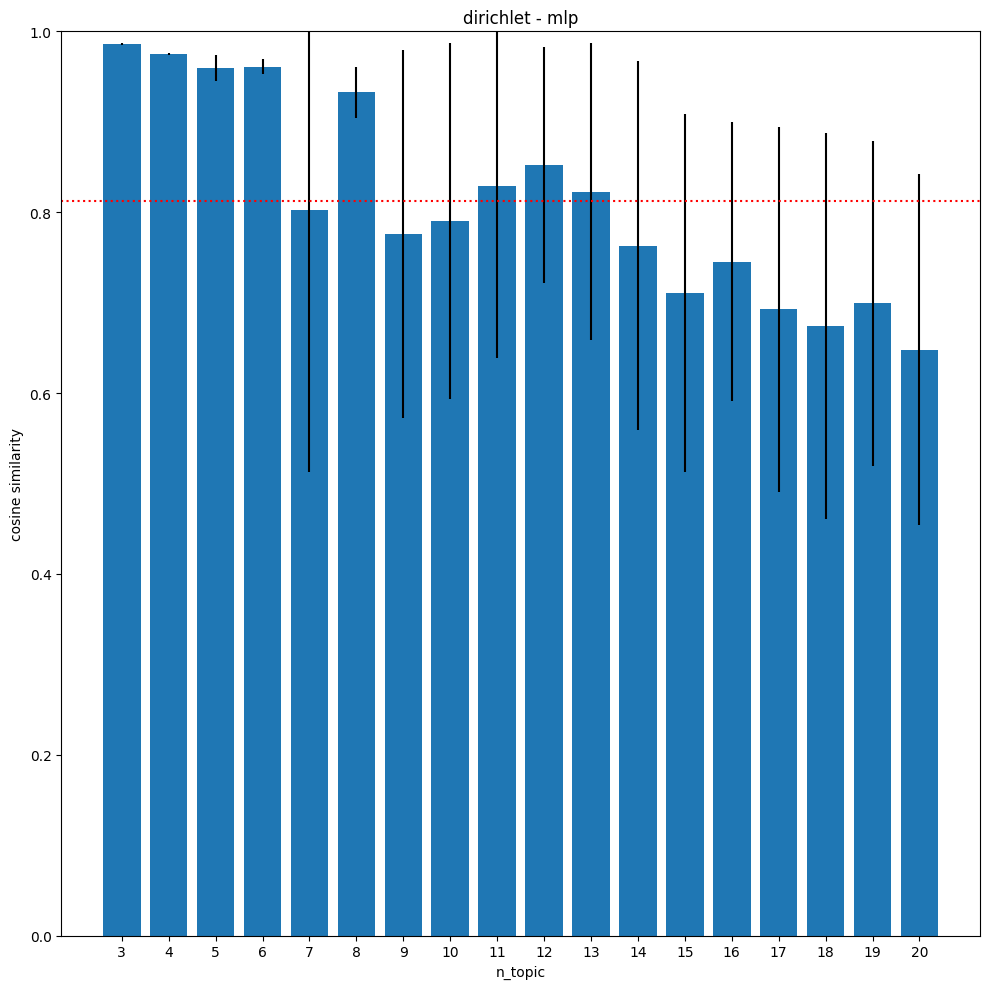

In [4]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": False,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (without covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

### diri * mlp (update=True)

100%|██████████| 10000/10000 [01:58<00:00, 84.32it/s]



Epoch   1	Mean Training Loss:3.2706418

Topic_0: ['word_230', 'word_103', 'word_445', 'word_517', 'word_911']
Topic_1: ['word_436', 'word_415', 'word_188', 'word_19', 'word_517']
Topic_2: ['word_436', 'word_415', 'word_230', 'word_188', 'word_19']
Intercept: ['word_436', 'word_415', 'word_230', 'word_517', 'word_445']
content: ['word_517', 'word_677', 'word_412', 'word_911', 'word_132']



Epoch   2	Mean Training Loss:1.1108248

Topic_0: ['word_445', 'word_230', 'word_517', 'word_103', 'word_881']
Topic_1: ['word_436', 'word_188', 'word_415', 'word_19', 'word_230']
Topic_2: ['word_436', 'word_415', 'word_230', 'word_188', 'word_19']
Intercept: ['word_436', 'word_415', 'word_230', 'word_445', 'word_517']
content: ['word_911', 'word_677', 'word_517', 'word_412', 'word_132']



Epoch   3	Mean Training Loss:0.8285181

Topic_0: ['word_445', 'word_230', 'word_517', 'word_388', 'word_881']
Topic_1: ['word_436', 'word_188', 'word_19', 'word_415', 'word_517']
Topic_2: ['word_436', 'word_415', 

100%|██████████| 10000/10000 [01:56<00:00, 85.79it/s]



Epoch   1	Mean Training Loss:3.3067873

Topic_0: ['word_99', 'word_184', 'word_300', 'word_792', 'word_249']
Topic_1: ['word_792', 'word_909', 'word_356', 'word_931', 'word_184']
Topic_2: ['word_719', 'word_14', 'word_184', 'word_370', 'word_832']
Topic_3: ['word_792', 'word_931', 'word_184', 'word_909', 'word_356']
Intercept: ['word_184', 'word_792', 'word_99', 'word_14', 'word_832']
content: ['word_792', 'word_909', 'word_356', 'word_931', 'word_285']



Epoch   2	Mean Training Loss:1.1069802

Topic_0: ['word_99', 'word_184', 'word_300', 'word_249', 'word_792']
Topic_1: ['word_792', 'word_909', 'word_931', 'word_285', 'word_832']
Topic_2: ['word_719', 'word_14', 'word_370', 'word_184', 'word_832']
Topic_3: ['word_792', 'word_931', 'word_909', 'word_285', 'word_356']
Intercept: ['word_184', 'word_792', 'word_99', 'word_14', 'word_832']
content: ['word_792', 'word_909', 'word_285', 'word_931', 'word_356']



Epoch   3	Mean Training Loss:0.6646041

Topic_0: ['word_99', 'word_184', 'wor

100%|██████████| 10000/10000 [01:55<00:00, 86.40it/s]



Epoch   1	Mean Training Loss:3.9760474

Topic_0: ['word_716', 'word_512', 'word_161', 'word_209', 'word_20']
Topic_1: ['word_716', 'word_512', 'word_161', 'word_495', 'word_209']
Topic_2: ['word_716', 'word_161', 'word_512', 'word_209', 'word_957']
Topic_3: ['word_716', 'word_209', 'word_512', 'word_161', 'word_20']
Topic_4: ['word_716', 'word_512', 'word_209', 'word_161', 'word_23']
Intercept: ['word_716', 'word_512', 'word_161', 'word_495', 'word_209']
content: ['word_716', 'word_23', 'word_150', 'word_161', 'word_209']



Epoch   2	Mean Training Loss:2.6043720

Topic_0: ['word_716', 'word_512', 'word_161', 'word_209', 'word_20']
Topic_1: ['word_716', 'word_512', 'word_161', 'word_209', 'word_495']
Topic_2: ['word_716', 'word_161', 'word_512', 'word_209', 'word_20']
Topic_3: ['word_716', 'word_512', 'word_209', 'word_161', 'word_20']
Topic_4: ['word_716', 'word_512', 'word_161', 'word_209', 'word_23']
Intercept: ['word_716', 'word_512', 'word_161', 'word_495', 'word_957']
content: [

100%|██████████| 10000/10000 [01:55<00:00, 86.77it/s]



Epoch   1	Mean Training Loss:3.9912006

Topic_0: ['word_428', 'word_77', 'word_1', 'word_662', 'word_559']
Topic_1: ['word_428', 'word_77', 'word_662', 'word_1', 'word_434']
Topic_2: ['word_559', 'word_428', 'word_914', 'word_125', 'word_95']
Topic_3: ['word_428', 'word_77', 'word_559', 'word_1', 'word_662']
Topic_4: ['word_428', 'word_559', 'word_77', 'word_140', 'word_1']
Topic_5: ['word_559', 'word_428', 'word_177', 'word_632', 'word_749']
Intercept: ['word_428', 'word_559', 'word_1', 'word_77', 'word_662']
content: ['word_559', 'word_914', 'word_797', 'word_749', 'word_32']



Epoch   2	Mean Training Loss:1.2305324

Topic_0: ['word_428', 'word_77', 'word_662', 'word_1', 'word_434']
Topic_1: ['word_428', 'word_662', 'word_434', 'word_77', 'word_1']
Topic_2: ['word_428', 'word_559', 'word_914', 'word_125', 'word_95']
Topic_3: ['word_77', 'word_1', 'word_662', 'word_428', 'word_559']
Topic_4: ['word_428', 'word_77', 'word_1', 'word_434', 'word_559']
Topic_5: ['word_559', 'word_749', 

100%|██████████| 10000/10000 [01:55<00:00, 86.88it/s]



Epoch   1	Mean Training Loss:5.5087768

Topic_0: ['word_916', 'word_185', 'word_792', 'word_104', 'word_83']
Topic_1: ['word_916', 'word_104', 'word_185', 'word_792', 'word_83']
Topic_2: ['word_916', 'word_185', 'word_104', 'word_805', 'word_792']
Topic_3: ['word_185', 'word_916', 'word_792', 'word_104', 'word_83']
Topic_4: ['word_185', 'word_792', 'word_104', 'word_916', 'word_579']
Topic_5: ['word_916', 'word_185', 'word_792', 'word_805', 'word_83']
Topic_6: ['word_185', 'word_916', 'word_104', 'word_83', 'word_805']
Intercept: ['word_916', 'word_185', 'word_104', 'word_792', 'word_83']
content: ['word_916', 'word_805', 'word_345', 'word_185', 'word_549']



Epoch   2	Mean Training Loss:1.2887141

Topic_0: ['word_916', 'word_104', 'word_185', 'word_792', 'word_508']
Topic_1: ['word_104', 'word_916', 'word_185', 'word_579', 'word_792']
Topic_2: ['word_916', 'word_805', 'word_345', 'word_104', 'word_185']
Topic_3: ['word_805', 'word_792', 'word_916', 'word_104', 'word_83']
Topic_4: ['

100%|██████████| 10000/10000 [01:55<00:00, 86.67it/s]



Epoch   1	Mean Training Loss:7.2382557

Topic_0: ['word_263', 'word_394', 'word_923', 'word_269', 'word_465']
Topic_1: ['word_263', 'word_923', 'word_773', 'word_269', 'word_394']
Topic_2: ['word_263', 'word_923', 'word_394', 'word_465', 'word_632']
Topic_3: ['word_263', 'word_923', 'word_269', 'word_394', 'word_584']
Topic_4: ['word_263', 'word_923', 'word_632', 'word_394', 'word_465']
Topic_5: ['word_263', 'word_923', 'word_394', 'word_12', 'word_269']
Topic_6: ['word_263', 'word_242', 'word_632', 'word_923', 'word_394']
Topic_7: ['word_263', 'word_632', 'word_923', 'word_465', 'word_467']
Intercept: ['word_263', 'word_923', 'word_394', 'word_269', 'word_632']
content: ['word_263', 'word_632', 'word_465', 'word_708', 'word_890']



Epoch   2	Mean Training Loss:0.8679540

Topic_0: ['word_263', 'word_394', 'word_923', 'word_269', 'word_708']
Topic_1: ['word_263', 'word_923', 'word_773', 'word_584', 'word_269']
Topic_2: ['word_263', 'word_465', 'word_394', 'word_467', 'word_632']
Topic

100%|██████████| 10000/10000 [41:58<00:00,  3.97it/s]  



Epoch   1	Mean Training Loss:4.5070914

Topic_0: ['word_633', 'word_192', 'word_844', 'word_520', 'word_635']
Topic_1: ['word_844', 'word_292', 'word_759', 'word_295', 'word_253']
Topic_2: ['word_633', 'word_192', 'word_531', 'word_63', 'word_635']
Topic_3: ['word_633', 'word_192', 'word_531', 'word_520', 'word_844']
Topic_4: ['word_844', 'word_633', 'word_557', 'word_759', 'word_295']
Topic_5: ['word_844', 'word_633', 'word_759', 'word_531', 'word_626']
Topic_6: ['word_844', 'word_557', 'word_626', 'word_759', 'word_633']
Topic_7: ['word_633', 'word_192', 'word_63', 'word_531', 'word_626']
Topic_8: ['word_844', 'word_557', 'word_633', 'word_626', 'word_759']
Intercept: ['word_844', 'word_633', 'word_192', 'word_759', 'word_557']
content: ['word_633', 'word_192', 'word_520', 'word_531', 'word_63']



Epoch   2	Mean Training Loss:1.7804465

Topic_0: ['word_192', 'word_633', 'word_635', 'word_520', 'word_938']
Topic_1: ['word_844', 'word_292', 'word_759', 'word_295', 'word_253']
Topic_2

100%|██████████| 10000/10000 [01:54<00:00, 87.21it/s]



Epoch   1	Mean Training Loss:6.8089407

Topic_0: ['word_200', 'word_330', 'word_155', 'word_752', 'word_541']
Topic_1: ['word_541', 'word_155', 'word_200', 'word_330', 'word_752']
Topic_2: ['word_155', 'word_112', 'word_200', 'word_330', 'word_636']
Topic_3: ['word_155', 'word_636', 'word_112', 'word_330', 'word_200']
Topic_4: ['word_200', 'word_155', 'word_330', 'word_300', 'word_636']
Topic_5: ['word_155', 'word_330', 'word_200', 'word_752', 'word_541']
Topic_6: ['word_155', 'word_200', 'word_330', 'word_300', 'word_541']
Topic_7: ['word_752', 'word_155', 'word_330', 'word_200', 'word_541']
Topic_8: ['word_330', 'word_155', 'word_200', 'word_752', 'word_541']
Topic_9: ['word_155', 'word_300', 'word_200', 'word_330', 'word_636']
Intercept: ['word_330', 'word_155', 'word_200', 'word_541', 'word_752']
content: ['word_636', 'word_920', 'word_724', 'word_828', 'word_112']



Epoch   2	Mean Training Loss:1.8608471

Topic_0: ['word_330', 'word_200', 'word_752', 'word_541', 'word_155']
Topi

100%|██████████| 10000/10000 [1:07:07<00:00,  2.48it/s]    



Epoch   1	Mean Training Loss:5.2909410

Topic_0: ['word_511', 'word_998', 'word_841', 'word_222', 'word_893']
Topic_1: ['word_998', 'word_893', 'word_511', 'word_719', 'word_841']
Topic_2: ['word_998', 'word_511', 'word_841', 'word_222', 'word_640']
Topic_3: ['word_511', 'word_841', 'word_998', 'word_222', 'word_452']
Topic_4: ['word_998', 'word_511', 'word_841', 'word_222', 'word_530']
Topic_5: ['word_998', 'word_511', 'word_841', 'word_222', 'word_530']
Topic_6: ['word_511', 'word_998', 'word_222', 'word_841', 'word_452']
Topic_7: ['word_998', 'word_841', 'word_893', 'word_511', 'word_719']
Topic_8: ['word_511', 'word_841', 'word_998', 'word_530', 'word_987']
Topic_9: ['word_511', 'word_222', 'word_998', 'word_530', 'word_841']
Topic_10: ['word_511', 'word_998', 'word_222', 'word_841', 'word_530']
Intercept: ['word_511', 'word_998', 'word_841', 'word_222', 'word_530']
content: ['word_998', 'word_893', 'word_719', 'word_511', 'word_841']



Epoch   2	Mean Training Loss:1.3897309

Top

100%|██████████| 10000/10000 [02:04<00:00, 80.25it/s]



Epoch   1	Mean Training Loss:6.9750621

Topic_0: ['word_136', 'word_913', 'word_456', 'word_503', 'word_996']
Topic_1: ['word_136', 'word_913', 'word_996', 'word_503', 'word_456']
Topic_2: ['word_136', 'word_913', 'word_996', 'word_301', 'word_503']
Topic_3: ['word_913', 'word_136', 'word_456', 'word_503', 'word_889']
Topic_4: ['word_136', 'word_913', 'word_503', 'word_456', 'word_996']
Topic_5: ['word_136', 'word_913', 'word_996', 'word_889', 'word_456']
Topic_6: ['word_136', 'word_913', 'word_456', 'word_996', 'word_503']
Topic_7: ['word_136', 'word_913', 'word_456', 'word_996', 'word_889']
Topic_8: ['word_136', 'word_913', 'word_996', 'word_456', 'word_503']
Topic_9: ['word_913', 'word_136', 'word_996', 'word_456', 'word_761']
Topic_10: ['word_136', 'word_913', 'word_456', 'word_503', 'word_996']
Topic_11: ['word_136', 'word_913', 'word_889', 'word_442', 'word_503']
Intercept: ['word_136', 'word_913', 'word_456', 'word_996', 'word_889']
content: ['word_456', 'word_136', 'word_503',

100%|██████████| 10000/10000 [01:54<00:00, 87.01it/s]



Epoch   1	Mean Training Loss:5.3717202

Topic_0: ['word_45', 'word_905', 'word_412', 'word_822', 'word_992']
Topic_1: ['word_905', 'word_45', 'word_412', 'word_822', 'word_286']
Topic_2: ['word_45', 'word_905', 'word_412', 'word_822', 'word_992']
Topic_3: ['word_45', 'word_905', 'word_412', 'word_531', 'word_822']
Topic_4: ['word_45', 'word_905', 'word_968', 'word_531', 'word_992']
Topic_5: ['word_45', 'word_905', 'word_412', 'word_822', 'word_286']
Topic_6: ['word_45', 'word_905', 'word_412', 'word_822', 'word_286']
Topic_7: ['word_45', 'word_905', 'word_412', 'word_992', 'word_968']
Topic_8: ['word_45', 'word_905', 'word_412', 'word_822', 'word_968']
Topic_9: ['word_45', 'word_905', 'word_412', 'word_822', 'word_531']
Topic_10: ['word_45', 'word_905', 'word_412', 'word_822', 'word_968']
Topic_11: ['word_45', 'word_905', 'word_412', 'word_992', 'word_968']
Topic_12: ['word_905', 'word_45', 'word_412', 'word_286', 'word_822']
Intercept: ['word_45', 'word_905', 'word_412', 'word_992', 

100%|██████████| 10000/10000 [01:57<00:00, 84.79it/s]



Epoch   1	Mean Training Loss:5.7548629

Topic_0: ['word_841', 'word_940', 'word_479', 'word_770', 'word_853']
Topic_1: ['word_853', 'word_916', 'word_479', 'word_770', 'word_746']
Topic_2: ['word_770', 'word_479', 'word_940', 'word_916', 'word_853']
Topic_3: ['word_940', 'word_479', 'word_841', 'word_770', 'word_916']
Topic_4: ['word_940', 'word_841', 'word_479', 'word_313', 'word_770']
Topic_5: ['word_853', 'word_479', 'word_940', 'word_770', 'word_916']
Topic_6: ['word_940', 'word_841', 'word_479', 'word_770', 'word_916']
Topic_7: ['word_916', 'word_853', 'word_940', 'word_841', 'word_479']
Topic_8: ['word_479', 'word_916', 'word_841', 'word_360', 'word_770']
Topic_9: ['word_770', 'word_479', 'word_916', 'word_234', 'word_853']
Topic_10: ['word_479', 'word_853', 'word_916', 'word_746', 'word_841']
Topic_11: ['word_479', 'word_940', 'word_853', 'word_916', 'word_770']
Topic_12: ['word_853', 'word_479', 'word_770', 'word_940', 'word_841']
Topic_13: ['word_940', 'word_841', 'word_479',

100%|██████████| 10000/10000 [01:56<00:00, 85.50it/s]



Epoch   1	Mean Training Loss:5.7130635

Topic_0: ['word_664', 'word_618', 'word_736', 'word_869', 'word_130']
Topic_1: ['word_618', 'word_664', 'word_869', 'word_130', 'word_736']
Topic_2: ['word_618', 'word_736', 'word_664', 'word_130', 'word_254']
Topic_3: ['word_664', 'word_618', 'word_130', 'word_254', 'word_869']
Topic_4: ['word_664', 'word_618', 'word_736', 'word_254', 'word_858']
Topic_5: ['word_664', 'word_130', 'word_618', 'word_254', 'word_736']
Topic_6: ['word_618', 'word_664', 'word_736', 'word_254', 'word_130']
Topic_7: ['word_618', 'word_664', 'word_736', 'word_254', 'word_858']
Topic_8: ['word_618', 'word_664', 'word_736', 'word_130', 'word_869']
Topic_9: ['word_664', 'word_618', 'word_736', 'word_254', 'word_130']
Topic_10: ['word_664', 'word_618', 'word_130', 'word_254', 'word_869']
Topic_11: ['word_664', 'word_618', 'word_254', 'word_736', 'word_869']
Topic_12: ['word_664', 'word_618', 'word_130', 'word_736', 'word_254']
Topic_13: ['word_618', 'word_664', 'word_736',

100%|██████████| 10000/10000 [02:00<00:00, 82.91it/s]



Epoch   1	Mean Training Loss:6.4364157

Topic_0: ['word_581', 'word_256', 'word_775', 'word_786', 'word_45']
Topic_1: ['word_581', 'word_256', 'word_45', 'word_775', 'word_786']
Topic_2: ['word_581', 'word_775', 'word_256', 'word_45', 'word_653']
Topic_3: ['word_581', 'word_256', 'word_775', 'word_45', 'word_786']
Topic_4: ['word_581', 'word_256', 'word_775', 'word_45', 'word_827']
Topic_5: ['word_581', 'word_256', 'word_775', 'word_786', 'word_653']
Topic_6: ['word_581', 'word_256', 'word_775', 'word_45', 'word_653']
Topic_7: ['word_581', 'word_45', 'word_256', 'word_775', 'word_827']
Topic_8: ['word_581', 'word_256', 'word_775', 'word_653', 'word_45']
Topic_9: ['word_581', 'word_775', 'word_653', 'word_786', 'word_256']
Topic_10: ['word_581', 'word_256', 'word_775', 'word_45', 'word_653']
Topic_11: ['word_581', 'word_256', 'word_775', 'word_45', 'word_827']
Topic_12: ['word_581', 'word_256', 'word_775', 'word_786', 'word_45']
Topic_13: ['word_581', 'word_256', 'word_775', 'word_786'

100%|██████████| 10000/10000 [01:56<00:00, 85.70it/s]



Epoch   1	Mean Training Loss:5.5224904

Topic_0: ['word_9', 'word_889', 'word_568', 'word_881', 'word_28']
Topic_1: ['word_9', 'word_28', 'word_485', 'word_881', 'word_998']
Topic_2: ['word_889', 'word_998', 'word_881', 'word_485', 'word_815']
Topic_3: ['word_815', 'word_485', 'word_881', 'word_889', 'word_9']
Topic_4: ['word_9', 'word_28', 'word_998', 'word_881', 'word_875']
Topic_5: ['word_9', 'word_28', 'word_881', 'word_485', 'word_889']
Topic_6: ['word_9', 'word_881', 'word_815', 'word_998', 'word_485']
Topic_7: ['word_881', 'word_889', 'word_815', 'word_9', 'word_998']
Topic_8: ['word_9', 'word_881', 'word_485', 'word_28', 'word_815']
Topic_9: ['word_9', 'word_28', 'word_881', 'word_998', 'word_485']
Topic_10: ['word_889', 'word_881', 'word_815', 'word_998', 'word_485']
Topic_11: ['word_9', 'word_28', 'word_881', 'word_998', 'word_889']
Topic_12: ['word_881', 'word_485', 'word_889', 'word_815', 'word_998']
Topic_13: ['word_9', 'word_889', 'word_881', 'word_28', 'word_485']
Topic

100%|██████████| 10000/10000 [01:56<00:00, 85.80it/s]



Epoch   1	Mean Training Loss:8.4922668

Topic_0: ['word_422', 'word_827', 'word_790', 'word_787', 'word_616']
Topic_1: ['word_422', 'word_827', 'word_787', 'word_790', 'word_277']
Topic_2: ['word_422', 'word_827', 'word_787', 'word_790', 'word_616']
Topic_3: ['word_422', 'word_827', 'word_376', 'word_787', 'word_790']
Topic_4: ['word_422', 'word_827', 'word_787', 'word_376', 'word_790']
Topic_5: ['word_422', 'word_827', 'word_787', 'word_376', 'word_627']
Topic_6: ['word_422', 'word_827', 'word_376', 'word_790', 'word_787']
Topic_7: ['word_422', 'word_827', 'word_376', 'word_787', 'word_790']
Topic_8: ['word_422', 'word_827', 'word_277', 'word_376', 'word_616']
Topic_9: ['word_422', 'word_827', 'word_787', 'word_376', 'word_790']
Topic_10: ['word_422', 'word_827', 'word_787', 'word_376', 'word_790']
Topic_11: ['word_422', 'word_827', 'word_376', 'word_97', 'word_277']
Topic_12: ['word_422', 'word_827', 'word_787', 'word_376', 'word_277']
Topic_13: ['word_422', 'word_827', 'word_787', 

100%|██████████| 10000/10000 [01:57<00:00, 85.33it/s]



Epoch   1	Mean Training Loss:5.9329997

Topic_0: ['word_337', 'word_531', 'word_774', 'word_570', 'word_671']
Topic_1: ['word_337', 'word_531', 'word_774', 'word_12', 'word_570']
Topic_2: ['word_337', 'word_531', 'word_774', 'word_570', 'word_12']
Topic_3: ['word_337', 'word_531', 'word_774', 'word_570', 'word_671']
Topic_4: ['word_337', 'word_531', 'word_774', 'word_570', 'word_12']
Topic_5: ['word_337', 'word_531', 'word_774', 'word_570', 'word_742']
Topic_6: ['word_337', 'word_531', 'word_774', 'word_570', 'word_583']
Topic_7: ['word_337', 'word_531', 'word_774', 'word_570', 'word_742']
Topic_8: ['word_337', 'word_531', 'word_774', 'word_570', 'word_671']
Topic_9: ['word_337', 'word_531', 'word_774', 'word_671', 'word_570']
Topic_10: ['word_337', 'word_531', 'word_774', 'word_570', 'word_671']
Topic_11: ['word_337', 'word_531', 'word_774', 'word_570', 'word_671']
Topic_12: ['word_337', 'word_531', 'word_774', 'word_671', 'word_570']
Topic_13: ['word_337', 'word_531', 'word_774', 'w

100%|██████████| 10000/10000 [01:57<00:00, 85.31it/s]



Epoch   1	Mean Training Loss:8.7254492

Topic_0: ['word_256', 'word_339', 'word_232', 'word_769', 'word_620']
Topic_1: ['word_256', 'word_232', 'word_339', 'word_970', 'word_769']
Topic_2: ['word_256', 'word_232', 'word_339', 'word_970', 'word_450']
Topic_3: ['word_256', 'word_232', 'word_339', 'word_970', 'word_769']
Topic_4: ['word_256', 'word_339', 'word_232', 'word_450', 'word_970']
Topic_5: ['word_256', 'word_232', 'word_339', 'word_970', 'word_769']
Topic_6: ['word_256', 'word_339', 'word_232', 'word_450', 'word_866']
Topic_7: ['word_256', 'word_232', 'word_339', 'word_970', 'word_769']
Topic_8: ['word_256', 'word_232', 'word_339', 'word_970', 'word_620']
Topic_9: ['word_256', 'word_232', 'word_339', 'word_866', 'word_620']
Topic_10: ['word_256', 'word_339', 'word_232', 'word_576', 'word_970']
Topic_11: ['word_256', 'word_339', 'word_232', 'word_970', 'word_783']
Topic_12: ['word_256', 'word_232', 'word_339', 'word_970', 'word_620']
Topic_13: ['word_256', 'word_232', 'word_339',

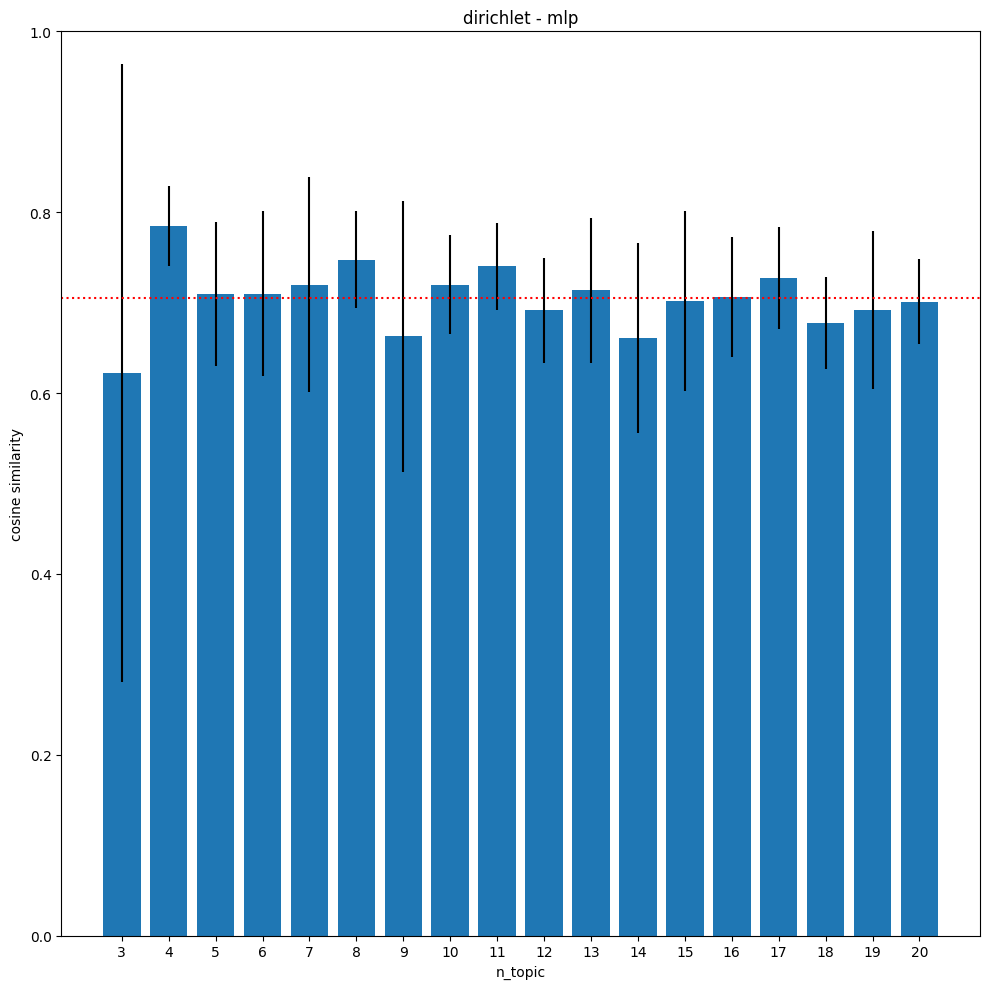

In [17]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (with covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm
    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

100%|██████████| 10000/10000 [01:56<00:00, 86.10it/s]



Epoch   1	Mean Training Loss:4.1517786

Topic_0: ['word_436', 'word_188', 'word_230', 'word_415', 'word_517']
Topic_1: ['word_188', 'word_436', 'word_987', 'word_285', 'word_230']
Topic_2: ['word_230', 'word_517', 'word_445', 'word_327', 'word_911']
Intercept: ['word_436', 'word_415', 'word_230', 'word_517', 'word_445']
content: ['word_517', 'word_230', 'word_677', 'word_429', 'word_132']



Epoch   2	Mean Training Loss:1.1566715

Topic_0: ['word_436', 'word_188', 'word_415', 'word_230', 'word_19']
Topic_1: ['word_436', 'word_230', 'word_188', 'word_415', 'word_427']
Topic_2: ['word_517', 'word_5', 'word_677', 'word_230', 'word_445']
Intercept: ['word_436', 'word_415', 'word_230', 'word_445', 'word_517']
content: ['word_517', 'word_677', 'word_911', 'word_429', 'word_132']



Epoch   3	Mean Training Loss:0.8899175

Topic_0: ['word_436', 'word_188', 'word_230', 'word_415', 'word_19']
Topic_1: ['word_436', 'word_230', 'word_415', 'word_188', 'word_427']
Topic_2: ['word_517', 'word_5', '

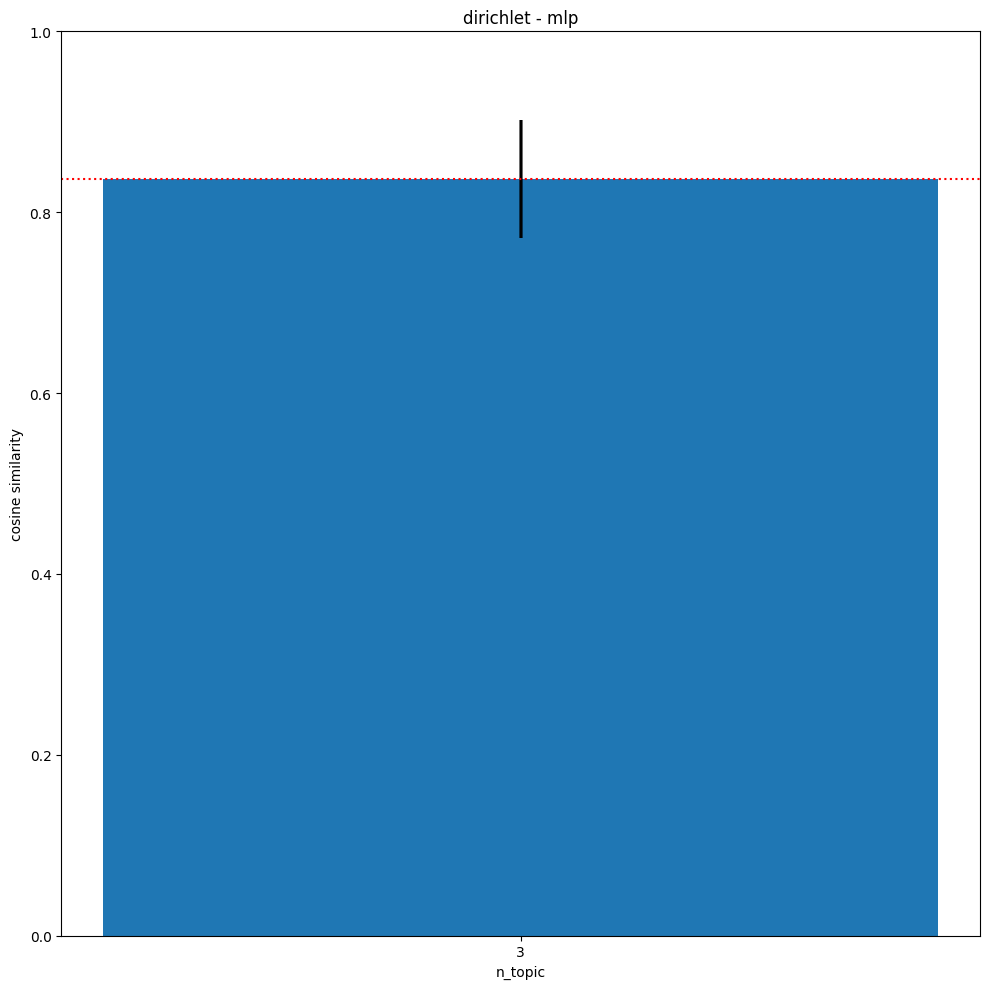

In [16]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,4):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "mlp",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":num_topics
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (with covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm
    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()
    break

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,4))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,4))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

### diri * sage (update=False)

100%|██████████| 10000/10000 [01:53<00:00, 87.96it/s]



Epoch   1	Mean Training Loss:11.0437199

Topic_0: ['word_65', 'word_141', 'word_27', 'word_332', 'word_787']
Topic_1: ['word_337', 'word_693', 'word_650', 'word_182', 'word_69']
Topic_2: ['word_648', 'word_78', 'word_685', 'word_891', 'word_758']



Epoch   2	Mean Training Loss:6.3367955

Topic_0: ['word_65', 'word_27', 'word_141', 'word_332', 'word_787']
Topic_1: ['word_337', 'word_693', 'word_650', 'word_69', 'word_182']
Topic_2: ['word_648', 'word_891', 'word_78', 'word_685', 'word_266']



Epoch   3	Mean Training Loss:4.7803496

Topic_0: ['word_65', 'word_27', 'word_141', 'word_332', 'word_787']
Topic_1: ['word_337', 'word_693', 'word_650', 'word_69', 'word_182']
Topic_2: ['word_648', 'word_78', 'word_891', 'word_266', 'word_982']



Epoch   4	Mean Training Loss:4.4651630

Topic_0: ['word_65', 'word_27', 'word_141', 'word_787', 'word_8']
Topic_1: ['word_337', 'word_693', 'word_650', 'word_69', 'word_182']
Topic_2: ['word_78', 'word_266', 'word_648', 'word_982', 'word_799']



Epoc

100%|██████████| 10000/10000 [01:52<00:00, 88.51it/s]



Epoch   1	Mean Training Loss:12.3389570

Topic_0: ['word_319', 'word_748', 'word_757', 'word_908', 'word_850']
Topic_1: ['word_649', 'word_857', 'word_955', 'word_386', 'word_676']
Topic_2: ['word_672', 'word_871', 'word_623', 'word_925', 'word_312']
Topic_3: ['word_287', 'word_801', 'word_82', 'word_286', 'word_285']



Epoch   2	Mean Training Loss:9.2625365

Topic_0: ['word_319', 'word_757', 'word_748', 'word_850', 'word_181']
Topic_1: ['word_649', 'word_857', 'word_386', 'word_589', 'word_955']
Topic_2: ['word_672', 'word_871', 'word_623', 'word_312', 'word_421']
Topic_3: ['word_287', 'word_82', 'word_801', 'word_400', 'word_286']



Epoch   3	Mean Training Loss:6.9422064

Topic_0: ['word_850', 'word_757', 'word_181', 'word_319', 'word_877']
Topic_1: ['word_649', 'word_648', 'word_386', 'word_857', 'word_589']
Topic_2: ['word_871', 'word_672', 'word_312', 'word_623', 'word_212']
Topic_3: ['word_287', 'word_82', 'word_801', 'word_400', 'word_870']



Epoch   4	Mean Training Loss:6.2

100%|██████████| 10000/10000 [01:53<00:00, 88.42it/s]



Epoch   1	Mean Training Loss:11.3581312

Topic_0: ['word_705', 'word_150', 'word_777', 'word_221', 'word_441']
Topic_1: ['word_64', 'word_800', 'word_496', 'word_984', 'word_481']
Topic_2: ['word_177', 'word_976', 'word_438', 'word_741', 'word_311']
Topic_3: ['word_605', 'word_524', 'word_650', 'word_338', 'word_385']
Topic_4: ['word_805', 'word_859', 'word_377', 'word_38', 'word_89']



Epoch   2	Mean Training Loss:4.4320468

Topic_0: ['word_705', 'word_150', 'word_441', 'word_324', 'word_66']
Topic_1: ['word_64', 'word_800', 'word_496', 'word_984', 'word_28']
Topic_2: ['word_177', 'word_438', 'word_976', 'word_311', 'word_935']
Topic_3: ['word_605', 'word_58', 'word_524', 'word_650', 'word_961']
Topic_4: ['word_38', 'word_859', 'word_377', 'word_805', 'word_89']



Epoch   3	Mean Training Loss:3.6978553

Topic_0: ['word_705', 'word_253', 'word_150', 'word_78', 'word_221']
Topic_1: ['word_800', 'word_496', 'word_64', 'word_28', 'word_984']
Topic_2: ['word_177', 'word_438', 'word_741'

100%|██████████| 10000/10000 [01:52<00:00, 88.87it/s]



Epoch   1	Mean Training Loss:13.2616811

Topic_0: ['word_420', 'word_230', 'word_862', 'word_126', 'word_81']
Topic_1: ['word_582', 'word_474', 'word_4', 'word_347', 'word_843']
Topic_2: ['word_785', 'word_533', 'word_148', 'word_415', 'word_837']
Topic_3: ['word_789', 'word_267', 'word_484', 'word_596', 'word_706']
Topic_4: ['word_715', 'word_230', 'word_440', 'word_337', 'word_512']
Topic_5: ['word_182', 'word_279', 'word_594', 'word_602', 'word_370']



Epoch   2	Mean Training Loss:11.0392125

Topic_0: ['word_230', 'word_862', 'word_420', 'word_81', 'word_159']
Topic_1: ['word_474', 'word_582', 'word_347', 'word_68', 'word_843']
Topic_2: ['word_785', 'word_533', 'word_415', 'word_148', 'word_837']
Topic_3: ['word_789', 'word_267', 'word_596', 'word_484', 'word_686']
Topic_4: ['word_715', 'word_230', 'word_440', 'word_337', 'word_374']
Topic_5: ['word_182', 'word_279', 'word_594', 'word_314', 'word_302']



Epoch   3	Mean Training Loss:7.7304084

Topic_0: ['word_230', 'word_126', 'w

100%|██████████| 10000/10000 [01:53<00:00, 88.08it/s]



Epoch   1	Mean Training Loss:13.5110701

Topic_0: ['word_896', 'word_81', 'word_754', 'word_606', 'word_999']
Topic_1: ['word_708', 'word_124', 'word_946', 'word_625', 'word_58']
Topic_2: ['word_342', 'word_346', 'word_92', 'word_235', 'word_862']
Topic_3: ['word_384', 'word_38', 'word_558', 'word_806', 'word_274']
Topic_4: ['word_396', 'word_676', 'word_153', 'word_291', 'word_296']
Topic_5: ['word_499', 'word_401', 'word_923', 'word_970', 'word_872']
Topic_6: ['word_844', 'word_960', 'word_781', 'word_1', 'word_184']



Epoch   2	Mean Training Loss:10.8783220

Topic_0: ['word_896', 'word_606', 'word_754', 'word_81', 'word_658']
Topic_1: ['word_708', 'word_124', 'word_153', 'word_891', 'word_625']
Topic_2: ['word_342', 'word_235', 'word_346', 'word_92', 'word_137']
Topic_3: ['word_384', 'word_38', 'word_274', 'word_483', 'word_806']
Topic_4: ['word_396', 'word_676', 'word_153', 'word_54', 'word_291']
Topic_5: ['word_499', 'word_497', 'word_970', 'word_923', 'word_401']
Topic_6: ['wor

100%|██████████| 10000/10000 [01:53<00:00, 88.43it/s]



Epoch   1	Mean Training Loss:13.3083018

Topic_0: ['word_283', 'word_276', 'word_605', 'word_300', 'word_609']
Topic_1: ['word_870', 'word_811', 'word_833', 'word_372', 'word_663']
Topic_2: ['word_683', 'word_79', 'word_2', 'word_491', 'word_642']
Topic_3: ['word_519', 'word_582', 'word_727', 'word_43', 'word_624']
Topic_4: ['word_550', 'word_749', 'word_283', 'word_896', 'word_388']
Topic_5: ['word_235', 'word_390', 'word_725', 'word_154', 'word_808']
Topic_6: ['word_201', 'word_910', 'word_109', 'word_985', 'word_937']
Topic_7: ['word_783', 'word_57', 'word_244', 'word_446', 'word_2']



Epoch   2	Mean Training Loss:9.6691252

Topic_0: ['word_276', 'word_144', 'word_283', 'word_609', 'word_300']
Topic_1: ['word_811', 'word_870', 'word_663', 'word_833', 'word_372']
Topic_2: ['word_683', 'word_491', 'word_79', 'word_2', 'word_15']
Topic_3: ['word_582', 'word_519', 'word_274', 'word_190', 'word_86']
Topic_4: ['word_550', 'word_749', 'word_896', 'word_388', 'word_826']
Topic_5: ['word_2

100%|██████████| 10000/10000 [01:52<00:00, 88.55it/s]



Epoch   1	Mean Training Loss:13.6483583

Topic_0: ['word_451', 'word_583', 'word_577', 'word_921', 'word_889']
Topic_1: ['word_787', 'word_241', 'word_150', 'word_661', 'word_834']
Topic_2: ['word_372', 'word_50', 'word_720', 'word_772', 'word_449']
Topic_3: ['word_599', 'word_703', 'word_84', 'word_658', 'word_803']
Topic_4: ['word_40', 'word_12', 'word_209', 'word_645', 'word_162']
Topic_5: ['word_255', 'word_713', 'word_762', 'word_347', 'word_116']
Topic_6: ['word_999', 'word_684', 'word_694', 'word_961', 'word_118']
Topic_7: ['word_451', 'word_629', 'word_829', 'word_548', 'word_945']
Topic_8: ['word_631', 'word_925', 'word_728', 'word_830', 'word_618']



Epoch   2	Mean Training Loss:10.1552209

Topic_0: ['word_889', 'word_583', 'word_577', 'word_921', 'word_451']
Topic_1: ['word_787', 'word_661', 'word_150', 'word_757', 'word_834']
Topic_2: ['word_449', 'word_50', 'word_772', 'word_720', 'word_924']
Topic_3: ['word_599', 'word_84', 'word_803', 'word_107', 'word_358']
Topic_4: [

100%|██████████| 10000/10000 [01:53<00:00, 88.43it/s]



Epoch   1	Mean Training Loss:13.4815884

Topic_0: ['word_569', 'word_458', 'word_438', 'word_108', 'word_856']
Topic_1: ['word_444', 'word_511', 'word_603', 'word_735', 'word_562']
Topic_2: ['word_386', 'word_659', 'word_82', 'word_323', 'word_950']
Topic_3: ['word_287', 'word_614', 'word_826', 'word_905', 'word_933']
Topic_4: ['word_405', 'word_525', 'word_668', 'word_88', 'word_326']
Topic_5: ['word_151', 'word_420', 'word_37', 'word_95', 'word_775']
Topic_6: ['word_84', 'word_19', 'word_627', 'word_725', 'word_513']
Topic_7: ['word_325', 'word_254', 'word_669', 'word_304', 'word_486']
Topic_8: ['word_28', 'word_575', 'word_819', 'word_983', 'word_180']
Topic_9: ['word_762', 'word_752', 'word_101', 'word_687', 'word_230']



Epoch   2	Mean Training Loss:9.7095780

Topic_0: ['word_458', 'word_636', 'word_856', 'word_438', 'word_569']
Topic_1: ['word_511', 'word_603', 'word_444', 'word_530', 'word_735']
Topic_2: ['word_386', 'word_659', 'word_950', 'word_719', 'word_627']
Topic_3: ['w

100%|██████████| 10000/10000 [01:53<00:00, 88.28it/s]



Epoch   1	Mean Training Loss:13.6168172

Topic_0: ['word_225', 'word_355', 'word_776', 'word_598', 'word_909']
Topic_1: ['word_531', 'word_371', 'word_476', 'word_896', 'word_535']
Topic_2: ['word_278', 'word_498', 'word_838', 'word_330', 'word_533']
Topic_3: ['word_188', 'word_438', 'word_404', 'word_138', 'word_790']
Topic_4: ['word_343', 'word_672', 'word_392', 'word_223', 'word_413']
Topic_5: ['word_988', 'word_478', 'word_220', 'word_15', 'word_181']
Topic_6: ['word_580', 'word_790', 'word_726', 'word_861', 'word_959']
Topic_7: ['word_45', 'word_693', 'word_462', 'word_755', 'word_91']
Topic_8: ['word_822', 'word_740', 'word_222', 'word_352', 'word_954']
Topic_9: ['word_595', 'word_433', 'word_825', 'word_678', 'word_538']
Topic_10: ['word_92', 'word_533', 'word_480', 'word_737', 'word_309']



Epoch   2	Mean Training Loss:9.8302006

Topic_0: ['word_355', 'word_909', 'word_598', 'word_225', 'word_776']
Topic_1: ['word_531', 'word_371', 'word_702', 'word_476', 'word_535']
Topic_2:

100%|██████████| 10000/10000 [01:54<00:00, 87.24it/s]



Epoch   1	Mean Training Loss:13.2398998

Topic_0: ['word_548', 'word_628', 'word_505', 'word_587', 'word_920']
Topic_1: ['word_620', 'word_771', 'word_201', 'word_690', 'word_95']
Topic_2: ['word_188', 'word_160', 'word_686', 'word_852', 'word_96']
Topic_3: ['word_248', 'word_811', 'word_914', 'word_709', 'word_129']
Topic_4: ['word_508', 'word_330', 'word_700', 'word_138', 'word_283']
Topic_5: ['word_334', 'word_625', 'word_288', 'word_273', 'word_977']
Topic_6: ['word_465', 'word_818', 'word_85', 'word_811', 'word_813']
Topic_7: ['word_104', 'word_869', 'word_972', 'word_979', 'word_420']
Topic_8: ['word_96', 'word_345', 'word_203', 'word_79', 'word_840']
Topic_9: ['word_838', 'word_290', 'word_137', 'word_910', 'word_890']
Topic_10: ['word_611', 'word_549', 'word_940', 'word_506', 'word_999']
Topic_11: ['word_493', 'word_370', 'word_378', 'word_598', 'word_546']



Epoch   2	Mean Training Loss:9.5557101

Topic_0: ['word_548', 'word_628', 'word_189', 'word_505', 'word_920']
Topic_1:

100%|██████████| 10000/10000 [01:53<00:00, 87.85it/s]



Epoch   1	Mean Training Loss:13.6043684

Topic_0: ['word_298', 'word_393', 'word_445', 'word_894', 'word_619']
Topic_1: ['word_444', 'word_962', 'word_326', 'word_963', 'word_545']
Topic_2: ['word_208', 'word_394', 'word_595', 'word_605', 'word_909']
Topic_3: ['word_247', 'word_720', 'word_491', 'word_124', 'word_303']
Topic_4: ['word_905', 'word_78', 'word_974', 'word_853', 'word_967']
Topic_5: ['word_864', 'word_268', 'word_773', 'word_559', 'word_871']
Topic_6: ['word_226', 'word_167', 'word_510', 'word_190', 'word_156']
Topic_7: ['word_460', 'word_846', 'word_251', 'word_257', 'word_2']
Topic_8: ['word_823', 'word_126', 'word_522', 'word_280', 'word_279']
Topic_9: ['word_669', 'word_210', 'word_50', 'word_81', 'word_1']
Topic_10: ['word_265', 'word_338', 'word_766', 'word_45', 'word_381']
Topic_11: ['word_806', 'word_239', 'word_11', 'word_162', 'word_910']
Topic_12: ['word_646', 'word_760', 'word_502', 'word_86', 'word_768']



Epoch   2	Mean Training Loss:9.8261728

Topic_0: ['w

100%|██████████| 10000/10000 [01:52<00:00, 88.50it/s]



Epoch   1	Mean Training Loss:13.7721960

Topic_0: ['word_562', 'word_32', 'word_411', 'word_741', 'word_356']
Topic_1: ['word_776', 'word_305', 'word_999', 'word_7', 'word_296']
Topic_2: ['word_873', 'word_355', 'word_89', 'word_745', 'word_646']
Topic_3: ['word_734', 'word_417', 'word_308', 'word_253', 'word_645']
Topic_4: ['word_356', 'word_495', 'word_608', 'word_65', 'word_661']
Topic_5: ['word_449', 'word_611', 'word_603', 'word_437', 'word_461']
Topic_6: ['word_181', 'word_428', 'word_772', 'word_240', 'word_963']
Topic_7: ['word_209', 'word_94', 'word_578', 'word_524', 'word_2']
Topic_8: ['word_372', 'word_965', 'word_751', 'word_674', 'word_707']
Topic_9: ['word_119', 'word_202', 'word_117', 'word_949', 'word_398']
Topic_10: ['word_354', 'word_486', 'word_165', 'word_218', 'word_137']
Topic_11: ['word_330', 'word_666', 'word_464', 'word_818', 'word_152']
Topic_12: ['word_840', 'word_649', 'word_789', 'word_176', 'word_159']
Topic_13: ['word_135', 'word_718', 'word_530', 'word_

100%|██████████| 10000/10000 [01:53<00:00, 88.05it/s]



Epoch   1	Mean Training Loss:13.7672659

Topic_0: ['word_569', 'word_278', 'word_808', 'word_683', 'word_231']
Topic_1: ['word_761', 'word_150', 'word_956', 'word_711', 'word_246']
Topic_2: ['word_136', 'word_442', 'word_607', 'word_34', 'word_635']
Topic_3: ['word_670', 'word_983', 'word_737', 'word_867', 'word_300']
Topic_4: ['word_40', 'word_559', 'word_646', 'word_730', 'word_488']
Topic_5: ['word_568', 'word_954', 'word_509', 'word_110', 'word_678']
Topic_6: ['word_997', 'word_88', 'word_406', 'word_134', 'word_494']
Topic_7: ['word_279', 'word_648', 'word_493', 'word_869', 'word_21']
Topic_8: ['word_235', 'word_115', 'word_641', 'word_354', 'word_388']
Topic_9: ['word_883', 'word_489', 'word_551', 'word_517', 'word_939']
Topic_10: ['word_845', 'word_365', 'word_125', 'word_326', 'word_253']
Topic_11: ['word_606', 'word_71', 'word_221', 'word_215', 'word_106']
Topic_12: ['word_515', 'word_634', 'word_489', 'word_311', 'word_178']
Topic_13: ['word_621', 'word_599', 'word_640', 'wo

100%|██████████| 10000/10000 [01:52<00:00, 88.71it/s]



Epoch   1	Mean Training Loss:13.6708514

Topic_0: ['word_846', 'word_953', 'word_506', 'word_152', 'word_789']
Topic_1: ['word_999', 'word_852', 'word_16', 'word_428', 'word_321']
Topic_2: ['word_701', 'word_744', 'word_956', 'word_628', 'word_421']
Topic_3: ['word_167', 'word_282', 'word_478', 'word_955', 'word_482']
Topic_4: ['word_551', 'word_433', 'word_233', 'word_256', 'word_707']
Topic_5: ['word_966', 'word_531', 'word_597', 'word_903', 'word_762']
Topic_6: ['word_21', 'word_412', 'word_115', 'word_996', 'word_431']
Topic_7: ['word_450', 'word_330', 'word_170', 'word_542', 'word_314']
Topic_8: ['word_391', 'word_663', 'word_563', 'word_11', 'word_215']
Topic_9: ['word_467', 'word_316', 'word_918', 'word_158', 'word_190']
Topic_10: ['word_504', 'word_635', 'word_999', 'word_975', 'word_65']
Topic_11: ['word_528', 'word_81', 'word_114', 'word_204', 'word_364']
Topic_12: ['word_827', 'word_473', 'word_770', 'word_896', 'word_425']
Topic_13: ['word_305', 'word_482', 'word_268', 'wo

100%|██████████| 10000/10000 [01:53<00:00, 88.46it/s]



Epoch   1	Mean Training Loss:13.7182100

Topic_0: ['word_988', 'word_894', 'word_228', 'word_734', 'word_556']
Topic_1: ['word_89', 'word_259', 'word_653', 'word_672', 'word_922']
Topic_2: ['word_817', 'word_151', 'word_680', 'word_43', 'word_335']
Topic_3: ['word_843', 'word_984', 'word_150', 'word_390', 'word_562']
Topic_4: ['word_483', 'word_802', 'word_406', 'word_905', 'word_733']
Topic_5: ['word_804', 'word_651', 'word_685', 'word_988', 'word_749']
Topic_6: ['word_399', 'word_660', 'word_264', 'word_240', 'word_863']
Topic_7: ['word_296', 'word_892', 'word_701', 'word_111', 'word_338']
Topic_8: ['word_320', 'word_429', 'word_656', 'word_951', 'word_900']
Topic_9: ['word_590', 'word_440', 'word_238', 'word_463', 'word_310']
Topic_10: ['word_9', 'word_618', 'word_458', 'word_488', 'word_393']
Topic_11: ['word_998', 'word_335', 'word_187', 'word_547', 'word_454']
Topic_12: ['word_577', 'word_433', 'word_899', 'word_497', 'word_45']
Topic_13: ['word_796', 'word_471', 'word_100', 'wo

100%|██████████| 10000/10000 [01:52<00:00, 88.54it/s]



Epoch   1	Mean Training Loss:13.7709216

Topic_0: ['word_295', 'word_593', 'word_131', 'word_346', 'word_0']
Topic_1: ['word_77', 'word_819', 'word_433', 'word_590', 'word_550']
Topic_2: ['word_715', 'word_19', 'word_476', 'word_708', 'word_707']
Topic_3: ['word_298', 'word_735', 'word_34', 'word_22', 'word_480']
Topic_4: ['word_331', 'word_0', 'word_896', 'word_572', 'word_475']
Topic_5: ['word_56', 'word_724', 'word_414', 'word_430', 'word_76']
Topic_6: ['word_489', 'word_750', 'word_150', 'word_278', 'word_758']
Topic_7: ['word_223', 'word_272', 'word_552', 'word_475', 'word_988']
Topic_8: ['word_796', 'word_823', 'word_110', 'word_315', 'word_815']
Topic_9: ['word_424', 'word_974', 'word_601', 'word_273', 'word_61']
Topic_10: ['word_50', 'word_919', 'word_662', 'word_618', 'word_323']
Topic_11: ['word_383', 'word_234', 'word_922', 'word_522', 'word_893']
Topic_12: ['word_946', 'word_395', 'word_296', 'word_685', 'word_33']
Topic_13: ['word_599', 'word_997', 'word_243', 'word_710',

100%|██████████| 10000/10000 [01:52<00:00, 88.73it/s]



Epoch   1	Mean Training Loss:13.8260807

Topic_0: ['word_958', 'word_779', 'word_264', 'word_644', 'word_308']
Topic_1: ['word_202', 'word_378', 'word_191', 'word_182', 'word_749']
Topic_2: ['word_137', 'word_350', 'word_31', 'word_578', 'word_303']
Topic_3: ['word_366', 'word_220', 'word_687', 'word_710', 'word_481']
Topic_4: ['word_819', 'word_401', 'word_14', 'word_566', 'word_342']
Topic_5: ['word_299', 'word_713', 'word_447', 'word_499', 'word_778']
Topic_6: ['word_796', 'word_17', 'word_75', 'word_7', 'word_393']
Topic_7: ['word_408', 'word_944', 'word_431', 'word_771', 'word_528']
Topic_8: ['word_267', 'word_138', 'word_3', 'word_636', 'word_612']
Topic_9: ['word_119', 'word_991', 'word_543', 'word_673', 'word_807']
Topic_10: ['word_215', 'word_669', 'word_860', 'word_913', 'word_584']
Topic_11: ['word_10', 'word_201', 'word_665', 'word_86', 'word_350']
Topic_12: ['word_488', 'word_37', 'word_823', 'word_905', 'word_966']
Topic_13: ['word_606', 'word_897', 'word_407', 'word_617

100%|██████████| 10000/10000 [01:53<00:00, 88.47it/s]



Epoch   1	Mean Training Loss:13.9853424

Topic_0: ['word_644', 'word_601', 'word_181', 'word_939', 'word_832']
Topic_1: ['word_426', 'word_835', 'word_638', 'word_768', 'word_273']
Topic_2: ['word_670', 'word_378', 'word_185', 'word_177', 'word_66']
Topic_3: ['word_301', 'word_797', 'word_643', 'word_53', 'word_666']
Topic_4: ['word_66', 'word_203', 'word_218', 'word_993', 'word_860']
Topic_5: ['word_777', 'word_225', 'word_643', 'word_574', 'word_307']
Topic_6: ['word_254', 'word_990', 'word_25', 'word_557', 'word_459']
Topic_7: ['word_130', 'word_869', 'word_994', 'word_474', 'word_683']
Topic_8: ['word_881', 'word_771', 'word_727', 'word_230', 'word_280']
Topic_9: ['word_316', 'word_212', 'word_461', 'word_709', 'word_601']
Topic_10: ['word_770', 'word_318', 'word_699', 'word_563', 'word_934']
Topic_11: ['word_97', 'word_331', 'word_518', 'word_56', 'word_103']
Topic_12: ['word_285', 'word_645', 'word_841', 'word_500', 'word_225']
Topic_13: ['word_649', 'word_943', 'word_248', 'wor

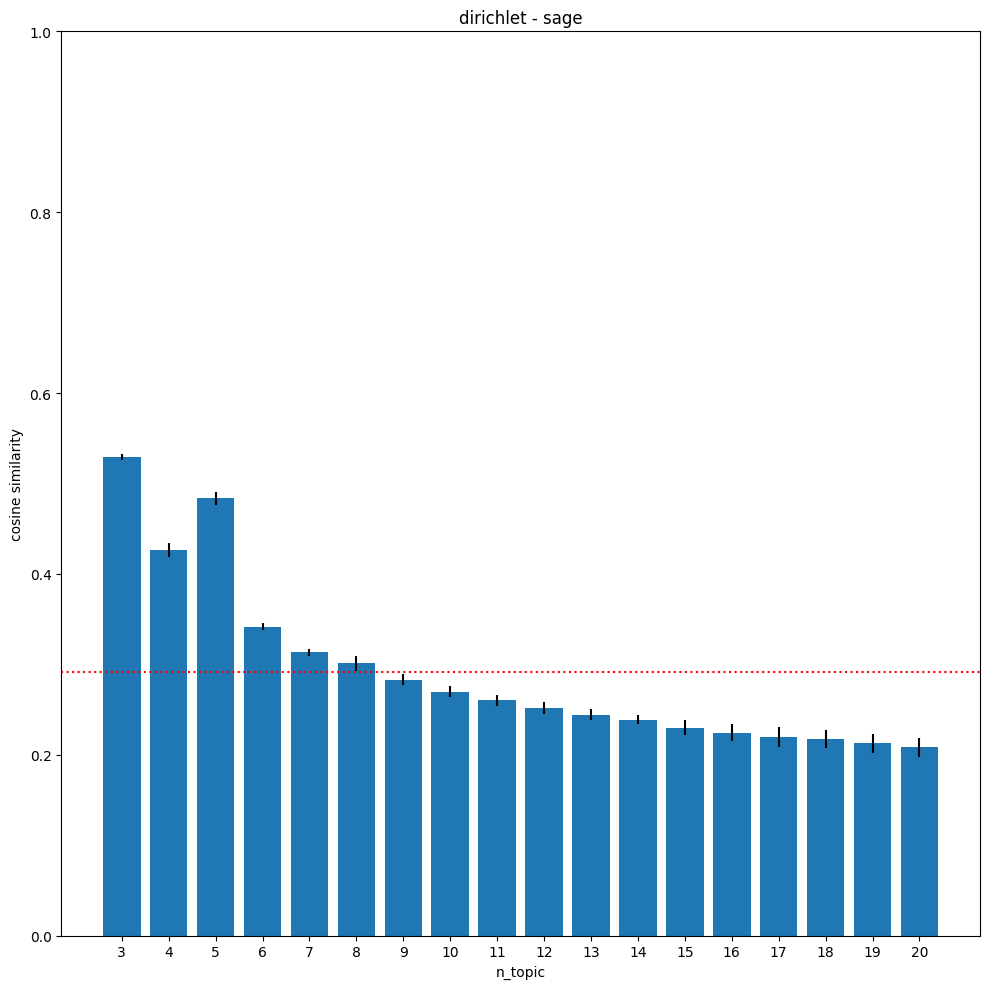

In [7]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": False,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "sage",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (without covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

100%|██████████| 10000/10000 [01:58<00:00, 84.31it/s]



Epoch   1	Mean Training Loss:10.8726896

Topic_0: ['word_736', 'word_228', 'word_693', 'word_414', 'word_978']
Topic_1: ['word_930', 'word_265', 'word_587', 'word_589', 'word_959']
Topic_2: ['word_362', 'word_92', 'word_264', 'word_316', 'word_741']



Epoch   2	Mean Training Loss:7.5531351

Topic_0: ['word_736', 'word_978', 'word_414', 'word_693', 'word_228']
Topic_1: ['word_265', 'word_930', 'word_587', 'word_959', 'word_589']
Topic_2: ['word_264', 'word_362', 'word_316', 'word_92', 'word_583']



Epoch   3	Mean Training Loss:6.4323348

Topic_0: ['word_693', 'word_414', 'word_978', 'word_736', 'word_228']
Topic_1: ['word_930', 'word_265', 'word_587', 'word_959', 'word_750']
Topic_2: ['word_264', 'word_316', 'word_583', 'word_362', 'word_92']



Epoch   4	Mean Training Loss:5.8792972

Topic_0: ['word_978', 'word_693', 'word_414', 'word_645', 'word_824']
Topic_1: ['word_930', 'word_265', 'word_587', 'word_750', 'word_959']
Topic_2: ['word_264', 'word_316', 'word_583', 'word_298', 'wor

100%|██████████| 10000/10000 [01:56<00:00, 85.80it/s]



Epoch   1	Mean Training Loss:11.3326012

Topic_0: ['word_901', 'word_567', 'word_705', 'word_132', 'word_563']
Topic_1: ['word_185', 'word_876', 'word_524', 'word_712', 'word_449']
Topic_2: ['word_551', 'word_245', 'word_259', 'word_10', 'word_420']
Topic_3: ['word_372', 'word_15', 'word_905', 'word_544', 'word_776']



Epoch   2	Mean Training Loss:8.0086746

Topic_0: ['word_901', 'word_567', 'word_132', 'word_611', 'word_171']
Topic_1: ['word_185', 'word_876', 'word_325', 'word_449', 'word_712']
Topic_2: ['word_551', 'word_245', 'word_10', 'word_259', 'word_420']
Topic_3: ['word_372', 'word_890', 'word_905', 'word_15', 'word_327']



Epoch   3	Mean Training Loss:6.9767110

Topic_0: ['word_567', 'word_901', 'word_611', 'word_132', 'word_205']
Topic_1: ['word_185', 'word_325', 'word_876', 'word_712', 'word_449']
Topic_2: ['word_551', 'word_245', 'word_420', 'word_412', 'word_10']
Topic_3: ['word_372', 'word_327', 'word_905', 'word_890', 'word_723']



Epoch   4	Mean Training Loss:6.274

100%|██████████| 10000/10000 [01:57<00:00, 84.82it/s]



Epoch   1	Mean Training Loss:11.6012377

Topic_0: ['word_70', 'word_927', 'word_967', 'word_311', 'word_690']
Topic_1: ['word_292', 'word_66', 'word_575', 'word_208', 'word_376']
Topic_2: ['word_916', 'word_385', 'word_998', 'word_308', 'word_298']
Topic_3: ['word_986', 'word_160', 'word_425', 'word_162', 'word_41']
Topic_4: ['word_323', 'word_313', 'word_846', 'word_535', 'word_506']



Epoch   2	Mean Training Loss:4.6239308

Topic_0: ['word_70', 'word_967', 'word_927', 'word_311', 'word_381']
Topic_1: ['word_208', 'word_292', 'word_575', 'word_215', 'word_66']
Topic_2: ['word_998', 'word_602', 'word_385', 'word_916', 'word_204']
Topic_3: ['word_986', 'word_160', 'word_103', 'word_162', 'word_720']
Topic_4: ['word_323', 'word_313', 'word_535', 'word_506', 'word_846']



Epoch   3	Mean Training Loss:3.6351177

Topic_0: ['word_70', 'word_927', 'word_967', 'word_311', 'word_585']
Topic_1: ['word_208', 'word_575', 'word_292', 'word_376', 'word_66']
Topic_2: ['word_602', 'word_385', 'word

100%|██████████| 10000/10000 [01:57<00:00, 84.94it/s]



Epoch   1	Mean Training Loss:12.6036896

Topic_0: ['word_444', 'word_975', 'word_525', 'word_502', 'word_344']
Topic_1: ['word_774', 'word_8', 'word_359', 'word_845', 'word_95']
Topic_2: ['word_711', 'word_405', 'word_834', 'word_422', 'word_200']
Topic_3: ['word_694', 'word_35', 'word_77', 'word_387', 'word_653']
Topic_4: ['word_571', 'word_3', 'word_55', 'word_229', 'word_46']
Topic_5: ['word_804', 'word_951', 'word_576', 'word_781', 'word_117']



Epoch   2	Mean Training Loss:8.9065752

Topic_0: ['word_444', 'word_645', 'word_502', 'word_975', 'word_145']
Topic_1: ['word_774', 'word_359', 'word_845', 'word_768', 'word_8']
Topic_2: ['word_711', 'word_405', 'word_699', 'word_394', 'word_422']
Topic_3: ['word_77', 'word_35', 'word_873', 'word_566', 'word_653']
Topic_4: ['word_571', 'word_55', 'word_801', 'word_229', 'word_3']
Topic_5: ['word_951', 'word_804', 'word_805', 'word_781', 'word_117']



Epoch   3	Mean Training Loss:7.5431286

Topic_0: ['word_444', 'word_975', 'word_645', 'w

100%|██████████| 10000/10000 [04:20<00:00, 38.39it/s] 



Epoch   1	Mean Training Loss:13.0581463

Topic_0: ['word_470', 'word_352', 'word_96', 'word_391', 'word_105']
Topic_1: ['word_345', 'word_276', 'word_846', 'word_906', 'word_173']
Topic_2: ['word_183', 'word_558', 'word_707', 'word_609', 'word_330']
Topic_3: ['word_64', 'word_498', 'word_256', 'word_870', 'word_458']
Topic_4: ['word_832', 'word_715', 'word_14', 'word_455', 'word_220']
Topic_5: ['word_156', 'word_534', 'word_294', 'word_918', 'word_454']
Topic_6: ['word_487', 'word_480', 'word_679', 'word_204', 'word_969']



Epoch   2	Mean Training Loss:9.3038562

Topic_0: ['word_470', 'word_219', 'word_970', 'word_105', 'word_96']
Topic_1: ['word_345', 'word_276', 'word_846', 'word_356', 'word_674']
Topic_2: ['word_183', 'word_558', 'word_609', 'word_330', 'word_296']
Topic_3: ['word_64', 'word_498', 'word_256', 'word_704', 'word_846']
Topic_4: ['word_715', 'word_220', 'word_247', 'word_538', 'word_832']
Topic_5: ['word_156', 'word_534', 'word_918', 'word_327', 'word_294']
Topic_6: [

100%|██████████| 10000/10000 [01:57<00:00, 85.00it/s]



Epoch   1	Mean Training Loss:12.8974687

Topic_0: ['word_885', 'word_62', 'word_296', 'word_159', 'word_686']
Topic_1: ['word_887', 'word_794', 'word_409', 'word_456', 'word_741']
Topic_2: ['word_740', 'word_580', 'word_516', 'word_910', 'word_509']
Topic_3: ['word_341', 'word_471', 'word_504', 'word_59', 'word_168']
Topic_4: ['word_612', 'word_485', 'word_434', 'word_882', 'word_1']
Topic_5: ['word_157', 'word_85', 'word_376', 'word_934', 'word_233']
Topic_6: ['word_791', 'word_991', 'word_569', 'word_574', 'word_694']
Topic_7: ['word_458', 'word_89', 'word_427', 'word_535', 'word_862']



Epoch   2	Mean Training Loss:9.2598804

Topic_0: ['word_885', 'word_159', 'word_686', 'word_62', 'word_296']
Topic_1: ['word_794', 'word_737', 'word_409', 'word_741', 'word_456']
Topic_2: ['word_740', 'word_467', 'word_381', 'word_339', 'word_910']
Topic_3: ['word_341', 'word_471', 'word_504', 'word_59', 'word_168']
Topic_4: ['word_612', 'word_485', 'word_434', 'word_621', 'word_882']
Topic_5: ['wo

100%|██████████| 10000/10000 [03:05<00:00, 53.77it/s] 



Epoch   1	Mean Training Loss:13.2500066

Topic_0: ['word_111', 'word_503', 'word_309', 'word_669', 'word_325']
Topic_1: ['word_697', 'word_954', 'word_233', 'word_669', 'word_630']
Topic_2: ['word_550', 'word_868', 'word_883', 'word_879', 'word_908']
Topic_3: ['word_686', 'word_200', 'word_174', 'word_153', 'word_463']
Topic_4: ['word_889', 'word_109', 'word_11', 'word_383', 'word_326']
Topic_5: ['word_900', 'word_265', 'word_467', 'word_452', 'word_789']
Topic_6: ['word_107', 'word_557', 'word_815', 'word_478', 'word_936']
Topic_7: ['word_919', 'word_215', 'word_34', 'word_955', 'word_257']
Topic_8: ['word_641', 'word_527', 'word_41', 'word_895', 'word_615']



Epoch   2	Mean Training Loss:9.4237551

Topic_0: ['word_111', 'word_325', 'word_556', 'word_19', 'word_620']
Topic_1: ['word_669', 'word_630', 'word_697', 'word_711', 'word_700']
Topic_2: ['word_879', 'word_868', 'word_550', 'word_203', 'word_883']
Topic_3: ['word_686', 'word_200', 'word_463', 'word_174', 'word_153']
Topic_4: 

100%|██████████| 10000/10000 [02:01<00:00, 82.06it/s]



Epoch   1	Mean Training Loss:13.5436746

Topic_0: ['word_128', 'word_584', 'word_681', 'word_989', 'word_888']
Topic_1: ['word_401', 'word_497', 'word_788', 'word_320', 'word_970']
Topic_2: ['word_751', 'word_489', 'word_996', 'word_921', 'word_364']
Topic_3: ['word_850', 'word_118', 'word_250', 'word_468', 'word_540']
Topic_4: ['word_586', 'word_333', 'word_228', 'word_684', 'word_257']
Topic_5: ['word_742', 'word_968', 'word_350', 'word_6', 'word_930']
Topic_6: ['word_690', 'word_502', 'word_875', 'word_155', 'word_289']
Topic_7: ['word_550', 'word_681', 'word_830', 'word_661', 'word_508']
Topic_8: ['word_830', 'word_925', 'word_690', 'word_460', 'word_179']
Topic_9: ['word_346', 'word_43', 'word_121', 'word_499', 'word_99']



Epoch   2	Mean Training Loss:9.6064409

Topic_0: ['word_681', 'word_888', 'word_354', 'word_978', 'word_678']
Topic_1: ['word_320', 'word_970', 'word_401', 'word_497', 'word_788']
Topic_2: ['word_751', 'word_27', 'word_489', 'word_605', 'word_836']
Topic_3: [

100%|██████████| 10000/10000 [01:57<00:00, 84.95it/s]



Epoch   1	Mean Training Loss:13.9155011

Topic_0: ['word_513', 'word_966', 'word_615', 'word_260', 'word_96']
Topic_1: ['word_171', 'word_316', 'word_226', 'word_46', 'word_320']
Topic_2: ['word_698', 'word_27', 'word_727', 'word_61', 'word_46']
Topic_3: ['word_493', 'word_813', 'word_842', 'word_554', 'word_738']
Topic_4: ['word_989', 'word_576', 'word_668', 'word_260', 'word_976']
Topic_5: ['word_373', 'word_928', 'word_120', 'word_568', 'word_244']
Topic_6: ['word_272', 'word_101', 'word_892', 'word_701', 'word_329']
Topic_7: ['word_271', 'word_353', 'word_564', 'word_492', 'word_120']
Topic_8: ['word_751', 'word_441', 'word_523', 'word_459', 'word_189']
Topic_9: ['word_446', 'word_820', 'word_521', 'word_462', 'word_944']
Topic_10: ['word_447', 'word_876', 'word_433', 'word_472', 'word_574']



Epoch   2	Mean Training Loss:10.3765466

Topic_0: ['word_966', 'word_513', 'word_260', 'word_484', 'word_877']
Topic_1: ['word_316', 'word_226', 'word_354', 'word_171', 'word_179']
Topic_2:

100%|██████████| 10000/10000 [01:57<00:00, 84.85it/s]



Epoch   1	Mean Training Loss:13.8459739

Topic_0: ['word_516', 'word_422', 'word_541', 'word_320', 'word_333']
Topic_1: ['word_811', 'word_336', 'word_902', 'word_715', 'word_115']
Topic_2: ['word_483', 'word_162', 'word_784', 'word_42', 'word_821']
Topic_3: ['word_549', 'word_756', 'word_599', 'word_10', 'word_270']
Topic_4: ['word_83', 'word_400', 'word_407', 'word_885', 'word_492']
Topic_5: ['word_480', 'word_999', 'word_423', 'word_517', 'word_676']
Topic_6: ['word_855', 'word_111', 'word_592', 'word_441', 'word_43']
Topic_7: ['word_187', 'word_559', 'word_930', 'word_567', 'word_141']
Topic_8: ['word_721', 'word_647', 'word_362', 'word_39', 'word_558']
Topic_9: ['word_411', 'word_482', 'word_31', 'word_717', 'word_892']
Topic_10: ['word_221', 'word_287', 'word_725', 'word_880', 'word_204']
Topic_11: ['word_879', 'word_383', 'word_891', 'word_742', 'word_418']



Epoch   2	Mean Training Loss:10.1335488

Topic_0: ['word_422', 'word_516', 'word_333', 'word_541', 'word_451']
Topic_1:

100%|██████████| 10000/10000 [01:57<00:00, 85.15it/s]



Epoch   1	Mean Training Loss:13.7942998

Topic_0: ['word_295', 'word_263', 'word_277', 'word_350', 'word_400']
Topic_1: ['word_305', 'word_95', 'word_410', 'word_765', 'word_26']
Topic_2: ['word_433', 'word_909', 'word_801', 'word_867', 'word_601']
Topic_3: ['word_55', 'word_51', 'word_164', 'word_24', 'word_693']
Topic_4: ['word_669', 'word_494', 'word_623', 'word_784', 'word_306']
Topic_5: ['word_496', 'word_717', 'word_846', 'word_276', 'word_397']
Topic_6: ['word_863', 'word_828', 'word_736', 'word_668', 'word_627']
Topic_7: ['word_306', 'word_126', 'word_249', 'word_586', 'word_636']
Topic_8: ['word_356', 'word_929', 'word_343', 'word_170', 'word_553']
Topic_9: ['word_284', 'word_417', 'word_442', 'word_347', 'word_380']
Topic_10: ['word_701', 'word_378', 'word_903', 'word_179', 'word_487']
Topic_11: ['word_639', 'word_619', 'word_148', 'word_854', 'word_540']
Topic_12: ['word_284', 'word_129', 'word_114', 'word_638', 'word_214']



Epoch   2	Mean Training Loss:9.9896604

Topic_0

100%|██████████| 10000/10000 [01:57<00:00, 84.85it/s]



Epoch   1	Mean Training Loss:13.9388223

Topic_0: ['word_690', 'word_332', 'word_815', 'word_85', 'word_176']
Topic_1: ['word_895', 'word_230', 'word_858', 'word_130', 'word_263']
Topic_2: ['word_873', 'word_954', 'word_849', 'word_902', 'word_437']
Topic_3: ['word_183', 'word_609', 'word_483', 'word_850', 'word_151']
Topic_4: ['word_286', 'word_501', 'word_837', 'word_646', 'word_757']
Topic_5: ['word_753', 'word_935', 'word_805', 'word_25', 'word_266']
Topic_6: ['word_33', 'word_503', 'word_719', 'word_225', 'word_594']
Topic_7: ['word_365', 'word_10', 'word_909', 'word_671', 'word_225']
Topic_8: ['word_47', 'word_684', 'word_260', 'word_934', 'word_844']
Topic_9: ['word_574', 'word_433', 'word_147', 'word_588', 'word_702']
Topic_10: ['word_463', 'word_647', 'word_274', 'word_77', 'word_575']
Topic_11: ['word_655', 'word_257', 'word_550', 'word_974', 'word_296']
Topic_12: ['word_459', 'word_681', 'word_175', 'word_588', 'word_162']
Topic_13: ['word_201', 'word_838', 'word_607', 'wor

100%|██████████| 10000/10000 [01:59<00:00, 83.48it/s]



Epoch   1	Mean Training Loss:13.5762287

Topic_0: ['word_549', 'word_873', 'word_938', 'word_302', 'word_587']
Topic_1: ['word_197', 'word_101', 'word_907', 'word_739', 'word_825']
Topic_2: ['word_217', 'word_560', 'word_845', 'word_989', 'word_446']
Topic_3: ['word_313', 'word_407', 'word_562', 'word_203', 'word_240']
Topic_4: ['word_321', 'word_839', 'word_705', 'word_826', 'word_730']
Topic_5: ['word_890', 'word_466', 'word_82', 'word_592', 'word_298']
Topic_6: ['word_929', 'word_531', 'word_799', 'word_173', 'word_462']
Topic_7: ['word_871', 'word_565', 'word_508', 'word_276', 'word_958']
Topic_8: ['word_856', 'word_370', 'word_476', 'word_421', 'word_206']
Topic_9: ['word_996', 'word_667', 'word_155', 'word_209', 'word_660']
Topic_10: ['word_256', 'word_951', 'word_868', 'word_947', 'word_504']
Topic_11: ['word_133', 'word_925', 'word_734', 'word_972', 'word_700']
Topic_12: ['word_971', 'word_977', 'word_56', 'word_878', 'word_979']
Topic_13: ['word_264', 'word_354', 'word_837', 

100%|██████████| 10000/10000 [01:58<00:00, 84.29it/s]



Epoch   1	Mean Training Loss:14.2445674

Topic_0: ['word_559', 'word_121', 'word_601', 'word_661', 'word_525']
Topic_1: ['word_808', 'word_47', 'word_506', 'word_550', 'word_680']
Topic_2: ['word_885', 'word_683', 'word_804', 'word_319', 'word_337']
Topic_3: ['word_773', 'word_799', 'word_221', 'word_382', 'word_787']
Topic_4: ['word_894', 'word_199', 'word_992', 'word_26', 'word_706']
Topic_5: ['word_757', 'word_129', 'word_427', 'word_861', 'word_149']
Topic_6: ['word_16', 'word_373', 'word_290', 'word_345', 'word_641']
Topic_7: ['word_272', 'word_48', 'word_997', 'word_860', 'word_332']
Topic_8: ['word_107', 'word_464', 'word_892', 'word_529', 'word_415']
Topic_9: ['word_783', 'word_241', 'word_140', 'word_259', 'word_527']
Topic_10: ['word_400', 'word_10', 'word_193', 'word_739', 'word_971']
Topic_11: ['word_443', 'word_520', 'word_418', 'word_618', 'word_441']
Topic_12: ['word_849', 'word_937', 'word_493', 'word_501', 'word_477']
Topic_13: ['word_210', 'word_116', 'word_133', 'wo

100%|██████████| 10000/10000 [01:59<00:00, 83.45it/s]



Epoch   1	Mean Training Loss:14.3810969

Topic_0: ['word_76', 'word_852', 'word_222', 'word_831', 'word_542']
Topic_1: ['word_454', 'word_492', 'word_375', 'word_955', 'word_940']
Topic_2: ['word_157', 'word_785', 'word_347', 'word_521', 'word_16']
Topic_3: ['word_330', 'word_427', 'word_745', 'word_395', 'word_515']
Topic_4: ['word_671', 'word_189', 'word_428', 'word_914', 'word_313']
Topic_5: ['word_979', 'word_273', 'word_762', 'word_904', 'word_914']
Topic_6: ['word_852', 'word_350', 'word_666', 'word_801', 'word_989']
Topic_7: ['word_322', 'word_180', 'word_57', 'word_572', 'word_944']
Topic_8: ['word_17', 'word_958', 'word_715', 'word_224', 'word_19']
Topic_9: ['word_797', 'word_607', 'word_85', 'word_494', 'word_925']
Topic_10: ['word_965', 'word_562', 'word_984', 'word_152', 'word_329']
Topic_11: ['word_818', 'word_875', 'word_324', 'word_744', 'word_187']
Topic_12: ['word_588', 'word_579', 'word_562', 'word_632', 'word_859']
Topic_13: ['word_112', 'word_948', 'word_830', 'wor

100%|██████████| 10000/10000 [02:01<00:00, 82.15it/s]



Epoch   1	Mean Training Loss:14.0414025

Topic_0: ['word_843', 'word_127', 'word_349', 'word_240', 'word_152']
Topic_1: ['word_67', 'word_650', 'word_978', 'word_886', 'word_750']
Topic_2: ['word_177', 'word_665', 'word_195', 'word_140', 'word_791']
Topic_3: ['word_521', 'word_311', 'word_920', 'word_305', 'word_557']
Topic_4: ['word_645', 'word_436', 'word_882', 'word_452', 'word_777']
Topic_5: ['word_275', 'word_86', 'word_913', 'word_935', 'word_959']
Topic_6: ['word_860', 'word_914', 'word_326', 'word_956', 'word_360']
Topic_7: ['word_647', 'word_96', 'word_939', 'word_827', 'word_948']
Topic_8: ['word_31', 'word_807', 'word_193', 'word_492', 'word_385']
Topic_9: ['word_110', 'word_580', 'word_928', 'word_895', 'word_688']
Topic_10: ['word_106', 'word_453', 'word_524', 'word_139', 'word_630']
Topic_11: ['word_147', 'word_383', 'word_799', 'word_57', 'word_134']
Topic_12: ['word_165', 'word_95', 'word_375', 'word_563', 'word_635']
Topic_13: ['word_418', 'word_384', 'word_172', 'wor

100%|██████████| 10000/10000 [02:01<00:00, 82.58it/s]



Epoch   1	Mean Training Loss:13.8097707

Topic_0: ['word_603', 'word_331', 'word_296', 'word_796', 'word_432']
Topic_1: ['word_316', 'word_229', 'word_70', 'word_601', 'word_290']
Topic_2: ['word_17', 'word_531', 'word_820', 'word_296', 'word_485']
Topic_3: ['word_912', 'word_868', 'word_146', 'word_782', 'word_80']
Topic_4: ['word_945', 'word_475', 'word_759', 'word_702', 'word_997']
Topic_5: ['word_114', 'word_780', 'word_336', 'word_639', 'word_656']
Topic_6: ['word_16', 'word_46', 'word_428', 'word_459', 'word_638']
Topic_7: ['word_878', 'word_766', 'word_145', 'word_898', 'word_694']
Topic_8: ['word_725', 'word_131', 'word_87', 'word_585', 'word_576']
Topic_9: ['word_957', 'word_951', 'word_357', 'word_32', 'word_109']
Topic_10: ['word_111', 'word_126', 'word_528', 'word_926', 'word_334']
Topic_11: ['word_633', 'word_183', 'word_852', 'word_982', 'word_107']
Topic_12: ['word_508', 'word_294', 'word_28', 'word_533', 'word_607']
Topic_13: ['word_892', 'word_947', 'word_546', 'word_

100%|██████████| 10000/10000 [01:56<00:00, 85.54it/s]



Epoch   1	Mean Training Loss:13.8740676

Topic_0: ['word_351', 'word_964', 'word_329', 'word_159', 'word_30']
Topic_1: ['word_819', 'word_137', 'word_386', 'word_628', 'word_882']
Topic_2: ['word_829', 'word_727', 'word_751', 'word_501', 'word_506']
Topic_3: ['word_528', 'word_292', 'word_631', 'word_363', 'word_396']
Topic_4: ['word_380', 'word_101', 'word_822', 'word_426', 'word_350']
Topic_5: ['word_888', 'word_300', 'word_803', 'word_989', 'word_857']
Topic_6: ['word_459', 'word_679', 'word_615', 'word_635', 'word_358']
Topic_7: ['word_791', 'word_823', 'word_623', 'word_244', 'word_235']
Topic_8: ['word_189', 'word_968', 'word_828', 'word_358', 'word_493']
Topic_9: ['word_450', 'word_875', 'word_332', 'word_648', 'word_968']
Topic_10: ['word_552', 'word_993', 'word_610', 'word_929', 'word_335']
Topic_11: ['word_591', 'word_619', 'word_282', 'word_266', 'word_869']
Topic_12: ['word_801', 'word_802', 'word_852', 'word_404', 'word_442']
Topic_13: ['word_757', 'word_12', 'word_707', 

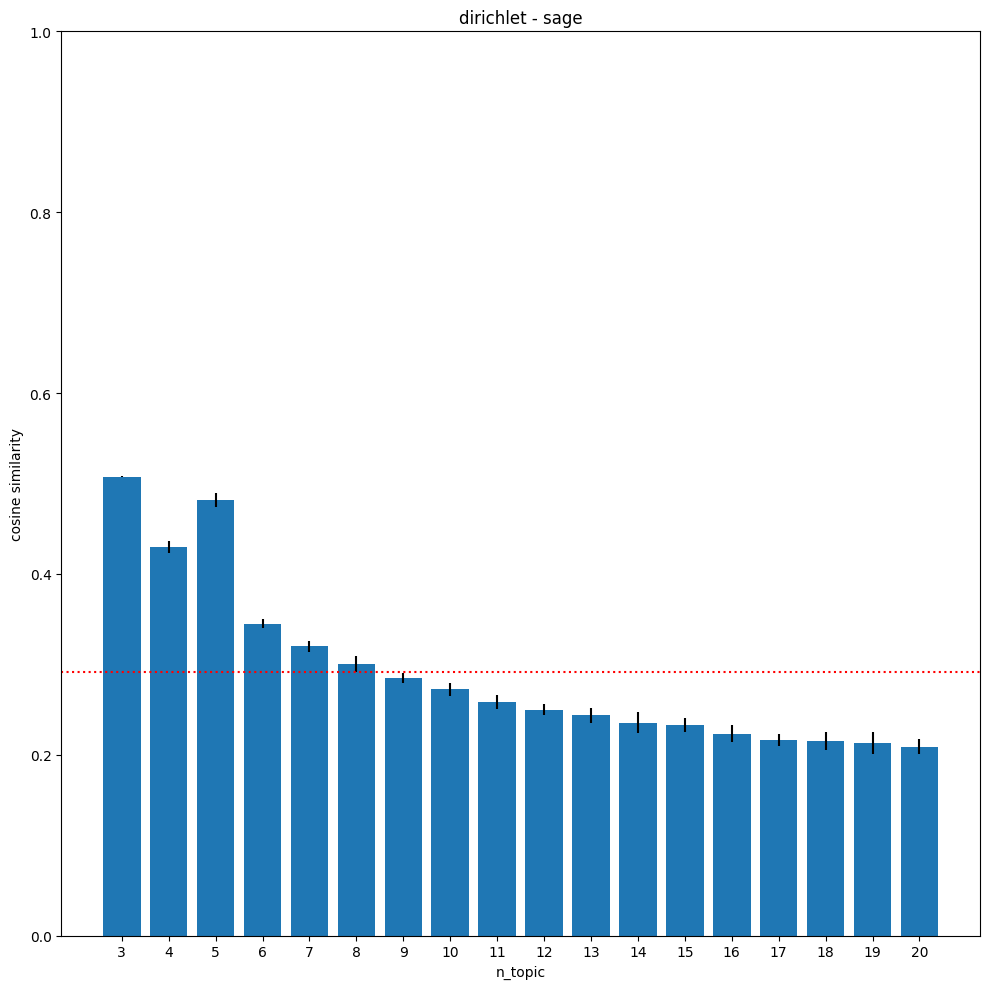

In [18]:
#change the seed of gtm

doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": False,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "sage",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":num_topics
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (without covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()

### diri * sage (update=True)

100%|██████████| 10000/10000 [01:52<00:00, 88.89it/s]



Epoch   1	Mean Training Loss:11.2818834

Topic_0: ['word_494', 'word_648', 'word_268', 'word_269', 'word_14']
Topic_1: ['word_10', 'word_335', 'word_100', 'word_964', 'word_432']
Topic_2: ['word_95', 'word_133', 'word_898', 'word_654', 'word_846']



Epoch   2	Mean Training Loss:2.7043995

Topic_0: ['word_494', 'word_648', 'word_268', 'word_309', 'word_729']
Topic_1: ['word_10', 'word_964', 'word_335', 'word_35', 'word_100']
Topic_2: ['word_846', 'word_898', 'word_189', 'word_121', 'word_95']



Epoch   3	Mean Training Loss:2.6516732

Topic_0: ['word_494', 'word_268', 'word_368', 'word_648', 'word_729']
Topic_1: ['word_964', 'word_10', 'word_35', 'word_690', 'word_222']
Topic_2: ['word_846', 'word_121', 'word_217', 'word_189', 'word_898']



Epoch   4	Mean Training Loss:2.6275695

Topic_0: ['word_494', 'word_368', 'word_462', 'word_729', 'word_268']
Topic_1: ['word_964', 'word_10', 'word_690', 'word_240', 'word_35']
Topic_2: ['word_846', 'word_121', 'word_217', 'word_189', 'word_735']

100%|██████████| 10000/10000 [01:53<00:00, 88.16it/s]



Epoch   1	Mean Training Loss:12.3425431

Topic_0: ['word_860', 'word_472', 'word_59', 'word_906', 'word_259']
Topic_1: ['word_674', 'word_187', 'word_564', 'word_200', 'word_953']
Topic_2: ['word_476', 'word_941', 'word_510', 'word_169', 'word_225']
Topic_3: ['word_285', 'word_548', 'word_192', 'word_284', 'word_527']



Epoch   2	Mean Training Loss:2.7016001

Topic_0: ['word_472', 'word_59', 'word_860', 'word_8', 'word_710']
Topic_1: ['word_674', 'word_187', 'word_647', 'word_67', 'word_953']
Topic_2: ['word_476', 'word_169', 'word_941', 'word_510', 'word_310']
Topic_3: ['word_198', 'word_548', 'word_192', 'word_957', 'word_814']



Epoch   3	Mean Training Loss:2.6415461

Topic_0: ['word_472', 'word_710', 'word_59', 'word_860', 'word_8']
Topic_1: ['word_674', 'word_187', 'word_647', 'word_67', 'word_953']
Topic_2: ['word_476', 'word_310', 'word_169', 'word_612', 'word_87']
Topic_3: ['word_198', 'word_548', 'word_957', 'word_814', 'word_768']



Epoch   4	Mean Training Loss:2.6163706


100%|██████████| 10000/10000 [01:52<00:00, 88.50it/s]



Epoch   1	Mean Training Loss:12.2002984

Topic_0: ['word_775', 'word_22', 'word_382', 'word_539', 'word_703']
Topic_1: ['word_48', 'word_248', 'word_765', 'word_730', 'word_277']
Topic_2: ['word_175', 'word_834', 'word_531', 'word_31', 'word_156']
Topic_3: ['word_865', 'word_93', 'word_435', 'word_932', 'word_854']
Topic_4: ['word_803', 'word_606', 'word_722', 'word_426', 'word_375']



Epoch   2	Mean Training Loss:3.3154308

Topic_0: ['word_775', 'word_382', 'word_22', 'word_703', 'word_539']
Topic_1: ['word_48', 'word_765', 'word_883', 'word_248', 'word_730']
Topic_2: ['word_175', 'word_834', 'word_531', 'word_156', 'word_974']
Topic_3: ['word_93', 'word_435', 'word_27', 'word_329', 'word_418']
Topic_4: ['word_803', 'word_722', 'word_368', 'word_129', 'word_606']



Epoch   3	Mean Training Loss:2.6386176

Topic_0: ['word_775', 'word_382', 'word_703', 'word_685', 'word_22']
Topic_1: ['word_48', 'word_883', 'word_765', 'word_8', 'word_248']
Topic_2: ['word_175', 'word_834', 'word_531'

100%|██████████| 10000/10000 [01:52<00:00, 88.83it/s]



Epoch   1	Mean Training Loss:11.9543738

Topic_0: ['word_536', 'word_475', 'word_466', 'word_148', 'word_36']
Topic_1: ['word_762', 'word_580', 'word_989', 'word_699', 'word_148']
Topic_2: ['word_682', 'word_633', 'word_146', 'word_184', 'word_854']
Topic_3: ['word_605', 'word_89', 'word_885', 'word_594', 'word_704']
Topic_4: ['word_713', 'word_234', 'word_667', 'word_643', 'word_372']
Topic_5: ['word_180', 'word_220', 'word_164', 'word_837', 'word_450']



Epoch   2	Mean Training Loss:3.9511928

Topic_0: ['word_536', 'word_466', 'word_475', 'word_77', 'word_148']
Topic_1: ['word_762', 'word_699', 'word_580', 'word_989', 'word_25']
Topic_2: ['word_184', 'word_633', 'word_682', 'word_146', 'word_575']
Topic_3: ['word_605', 'word_143', 'word_247', 'word_89', 'word_885']
Topic_4: ['word_234', 'word_372', 'word_28', 'word_450', 'word_921']
Topic_5: ['word_180', 'word_721', 'word_837', 'word_220', 'word_450']



Epoch   3	Mean Training Loss:2.6429432

Topic_0: ['word_536', 'word_77', 'word

100%|██████████| 10000/10000 [01:53<00:00, 88.42it/s]



Epoch   1	Mean Training Loss:13.2259032

Topic_0: ['word_997', 'word_49', 'word_998', 'word_808', 'word_210']
Topic_1: ['word_706', 'word_122', 'word_393', 'word_944', 'word_872']
Topic_2: ['word_742', 'word_384', 'word_72', 'word_233', 'word_860']
Topic_3: ['word_556', 'word_55', 'word_382', 'word_284', 'word_370']
Topic_4: ['word_151', 'word_932', 'word_146', 'word_91', 'word_674']
Topic_5: ['word_497', 'word_870', 'word_969', 'word_154', 'word_977']
Topic_6: ['word_946', 'word_322', 'word_691', 'word_305', 'word_967']



Epoch   2	Mean Training Loss:2.8069383

Topic_0: ['word_997', 'word_49', 'word_998', 'word_210', 'word_330']
Topic_1: ['word_706', 'word_122', 'word_393', 'word_89', 'word_944']
Topic_2: ['word_233', 'word_860', 'word_340', 'word_265', 'word_898']
Topic_3: ['word_556', 'word_370', 'word_55', 'word_284', 'word_785']
Topic_4: ['word_151', 'word_146', 'word_91', 'word_962', 'word_335']
Topic_5: ['word_497', 'word_870', 'word_110', 'word_154', 'word_969']
Topic_6: ['wo

100%|██████████| 10000/10000 [01:53<00:00, 88.45it/s]



Epoch   1	Mean Training Loss:13.3152358

Topic_0: ['word_38', 'word_739', 'word_356', 'word_137', 'word_500']
Topic_1: ['word_831', 'word_839', 'word_81', 'word_661', 'word_28']
Topic_2: ['word_235', 'word_148', 'word_609', 'word_339', 'word_198']
Topic_3: ['word_754', 'word_715', 'word_725', 'word_974', 'word_587']
Topic_4: ['word_31', 'word_549', 'word_824', 'word_890', 'word_952']
Topic_5: ['word_953', 'word_389', 'word_233', 'word_895', 'word_508']
Topic_6: ['word_935', 'word_107', 'word_709', 'word_715', 'word_719']
Topic_7: ['word_956', 'word_781', 'word_557', 'word_242', 'word_137']



Epoch   2	Mean Training Loss:2.8588543

Topic_0: ['word_739', 'word_38', 'word_356', 'word_500', 'word_97']
Topic_1: ['word_831', 'word_661', 'word_137', 'word_839', 'word_28']
Topic_2: ['word_609', 'word_235', 'word_148', 'word_198', 'word_108']
Topic_3: ['word_754', 'word_915', 'word_974', 'word_715', 'word_587']
Topic_4: ['word_31', 'word_549', 'word_824', 'word_890', 'word_386']
Topic_5: ['wo

100%|██████████| 10000/10000 [01:52<00:00, 88.61it/s]



Epoch   1	Mean Training Loss:13.0459564

Topic_0: ['word_581', 'word_575', 'word_608', 'word_485', 'word_928']
Topic_1: ['word_24', 'word_605', 'word_755', 'word_535', 'word_425']
Topic_2: ['word_370', 'word_300', 'word_65', 'word_499', 'word_949']
Topic_3: ['word_256', 'word_135', 'word_5', 'word_656', 'word_801']
Topic_4: ['word_399', 'word_100', 'word_118', 'word_426', 'word_660']
Topic_5: ['word_819', 'word_130', 'word_926', 'word_126', 'word_253']
Topic_6: ['word_818', 'word_200', 'word_557', 'word_425', 'word_653']
Topic_7: ['word_627', 'word_429', 'word_662', 'word_864', 'word_927']
Topic_8: ['word_923', 'word_540', 'word_355', 'word_834', 'word_726']



Epoch   2	Mean Training Loss:2.9784922

Topic_0: ['word_575', 'word_608', 'word_581', 'word_485', 'word_414']
Topic_1: ['word_755', 'word_24', 'word_605', 'word_301', 'word_772']
Topic_2: ['word_370', 'word_300', 'word_132', 'word_499', 'word_949']
Topic_3: ['word_256', 'word_801', 'word_135', 'word_94', 'word_5']
Topic_4: ['wo

100%|██████████| 10000/10000 [01:53<00:00, 88.35it/s]



Epoch   1	Mean Training Loss:13.3508412

Topic_0: ['word_691', 'word_551', 'word_456', 'word_106', 'word_890']
Topic_1: ['word_51', 'word_68', 'word_877', 'word_525', 'word_135']
Topic_2: ['word_600', 'word_556', 'word_948', 'word_11', 'word_658']
Topic_3: ['word_242', 'word_337', 'word_195', 'word_262', 'word_663']
Topic_4: ['word_420', 'word_190', 'word_656', 'word_403', 'word_698']
Topic_5: ['word_948', 'word_533', 'word_369', 'word_674', 'word_393']
Topic_6: ['word_499', 'word_920', 'word_754', 'word_188', 'word_862']
Topic_7: ['word_603', 'word_252', 'word_456', 'word_507', 'word_937']
Topic_8: ['word_278', 'word_515', 'word_573', 'word_551', 'word_424']
Topic_9: ['word_10', 'word_841', 'word_208', 'word_750', 'word_760']



Epoch   2	Mean Training Loss:2.9339617

Topic_0: ['word_691', 'word_551', 'word_106', 'word_367', 'word_297']
Topic_1: ['word_51', 'word_525', 'word_68', 'word_80', 'word_877']
Topic_2: ['word_600', 'word_948', 'word_556', 'word_658', 'word_11']
Topic_3: ['wo

100%|██████████| 10000/10000 [01:55<00:00, 86.22it/s]



Epoch   1	Mean Training Loss:13.5605940

Topic_0: ['word_774', 'word_262', 'word_287', 'word_409', 'word_596']
Topic_1: ['word_173', 'word_428', 'word_533', 'word_474', 'word_876']
Topic_2: ['word_484', 'word_531', 'word_471', 'word_63', 'word_879']
Topic_3: ['word_945', 'word_710', 'word_544', 'word_789', 'word_436']
Topic_4: ['word_977', 'word_427', 'word_390', 'word_339', 'word_847']
Topic_5: ['word_819', 'word_994', 'word_18', 'word_246', 'word_756']
Topic_6: ['word_165', 'word_291', 'word_789', 'word_86', 'word_917']
Topic_7: ['word_692', 'word_306', 'word_539', 'word_448', 'word_388']
Topic_8: ['word_808', 'word_689', 'word_557', 'word_560', 'word_952']
Topic_9: ['word_493', 'word_461', 'word_428', 'word_709', 'word_605']
Topic_10: ['word_962', 'word_996', 'word_531', 'word_977', 'word_669']



Epoch   2	Mean Training Loss:2.8956649

Topic_0: ['word_774', 'word_287', 'word_596', 'word_262', 'word_223']
Topic_1: ['word_173', 'word_428', 'word_287', 'word_474', 'word_297']
Topic_2

100%|██████████| 10000/10000 [01:53<00:00, 88.49it/s]



Epoch   1	Mean Training Loss:13.3962070

Topic_0: ['word_598', 'word_943', 'word_585', 'word_412', 'word_318']
Topic_1: ['word_948', 'word_619', 'word_437', 'word_350', 'word_967']
Topic_2: ['word_982', 'word_567', 'word_890', 'word_204', 'word_937']
Topic_3: ['word_912', 'word_846', 'word_831', 'word_393', 'word_902']
Topic_4: ['word_296', 'word_447', 'word_506', 'word_762', 'word_886']
Topic_5: ['word_674', 'word_332', 'word_286', 'word_969', 'word_658']
Topic_6: ['word_59', 'word_355', 'word_950', 'word_841', 'word_851']
Topic_7: ['word_867', 'word_140', 'word_102', 'word_11', 'word_991']
Topic_8: ['word_412', 'word_343', 'word_307', 'word_89', 'word_201']
Topic_9: ['word_31', 'word_318', 'word_254', 'word_575', 'word_692']
Topic_10: ['word_61', 'word_461', 'word_851', 'word_598', 'word_963']
Topic_11: ['word_369', 'word_787', 'word_824', 'word_641', 'word_376']



Epoch   2	Mean Training Loss:2.9772845

Topic_0: ['word_598', 'word_412', 'word_943', 'word_585', 'word_461']
Topic_1:

100%|██████████| 10000/10000 [01:54<00:00, 87.17it/s]



Epoch   1	Mean Training Loss:13.5217064

Topic_0: ['word_57', 'word_286', 'word_702', 'word_461', 'word_635']
Topic_1: ['word_960', 'word_239', 'word_324', 'word_109', 'word_625']
Topic_2: ['word_611', 'word_907', 'word_824', 'word_175', 'word_275']
Topic_3: ['word_122', 'word_402', 'word_668', 'word_418', 'word_301']
Topic_4: ['word_903', 'word_530', 'word_778', 'word_187', 'word_676']
Topic_5: ['word_513', 'word_862', 'word_881', 'word_827', 'word_838']
Topic_6: ['word_154', 'word_241', 'word_224', 'word_702', 'word_327']
Topic_7: ['word_850', 'word_844', 'word_198', 'word_702', 'word_25']
Topic_8: ['word_440', 'word_441', 'word_830', 'word_821', 'word_33']
Topic_9: ['word_808', 'word_883', 'word_7', 'word_585', 'word_135']
Topic_10: ['word_263', 'word_764', 'word_738', 'word_786', 'word_827']
Topic_11: ['word_804', 'word_461', 'word_237', 'word_966', 'word_370']
Topic_12: ['word_184', 'word_183', 'word_162', 'word_814', 'word_881']



Epoch   2	Mean Training Loss:2.9481228

Topic_0

100%|██████████| 10000/10000 [01:53<00:00, 87.89it/s]



Epoch   1	Mean Training Loss:13.7673205

Topic_0: ['word_421', 'word_126', 'word_428', 'word_861', 'word_868']
Topic_1: ['word_987', 'word_698', 'word_58', 'word_664', 'word_774']
Topic_2: ['word_2', 'word_353', 'word_888', 'word_36', 'word_477']
Topic_3: ['word_330', 'word_769', 'word_515', 'word_415', 'word_221']
Topic_4: ['word_282', 'word_58', 'word_164', 'word_648', 'word_398']
Topic_5: ['word_795', 'word_90', 'word_544', 'word_61', 'word_601']
Topic_6: ['word_18', 'word_19', 'word_656', 'word_770', 'word_385']
Topic_7: ['word_6', 'word_158', 'word_478', 'word_501', 'word_778']
Topic_8: ['word_705', 'word_370', 'word_908', 'word_287', 'word_344']
Topic_9: ['word_972', 'word_612', 'word_760', 'word_102', 'word_842']
Topic_10: ['word_693', 'word_726', 'word_842', 'word_484', 'word_865']
Topic_11: ['word_2', 'word_321', 'word_250', 'word_664', 'word_515']
Topic_12: ['word_214', 'word_99', 'word_280', 'word_735', 'word_647']
Topic_13: ['word_439', 'word_529', 'word_17', 'word_886', '

100%|██████████| 10000/10000 [01:53<00:00, 88.05it/s]



Epoch   1	Mean Training Loss:13.5782773

Topic_0: ['word_1', 'word_209', 'word_567', 'word_951', 'word_450']
Topic_1: ['word_754', 'word_450', 'word_959', 'word_479', 'word_6']
Topic_2: ['word_338', 'word_134', 'word_633', 'word_17', 'word_44']
Topic_3: ['word_865', 'word_225', 'word_905', 'word_508', 'word_277']
Topic_4: ['word_557', 'word_451', 'word_399', 'word_486', 'word_852']
Topic_5: ['word_624', 'word_793', 'word_469', 'word_247', 'word_921']
Topic_6: ['word_492', 'word_290', 'word_175', 'word_891', 'word_612']
Topic_7: ['word_277', 'word_590', 'word_0', 'word_491', 'word_119']
Topic_8: ['word_233', 'word_505', 'word_64', 'word_960', 'word_1']
Topic_9: ['word_960', 'word_929', 'word_607', 'word_6', 'word_169']
Topic_10: ['word_324', 'word_690', 'word_636', 'word_363', 'word_845']
Topic_11: ['word_315', 'word_470', 'word_608', 'word_505', 'word_429']
Topic_12: ['word_593', 'word_209', 'word_487', 'word_503', 'word_892']
Topic_13: ['word_52', 'word_4', 'word_242', 'word_950', 'w

100%|██████████| 10000/10000 [01:53<00:00, 88.33it/s]



Epoch   1	Mean Training Loss:13.6017057

Topic_0: ['word_966', 'word_399', 'word_556', 'word_637', 'word_865']
Topic_1: ['word_634', 'word_997', 'word_352', 'word_158', 'word_224']
Topic_2: ['word_42', 'word_535', 'word_406', 'word_394', 'word_904']
Topic_3: ['word_207', 'word_346', 'word_705', 'word_480', 'word_567']
Topic_4: ['word_324', 'word_87', 'word_257', 'word_820', 'word_705']
Topic_5: ['word_181', 'word_964', 'word_292', 'word_53', 'word_595']
Topic_6: ['word_410', 'word_113', 'word_63', 'word_221', 'word_148']
Topic_7: ['word_728', 'word_312', 'word_194', 'word_449', 'word_483']
Topic_8: ['word_181', 'word_42', 'word_143', 'word_813', 'word_109']
Topic_9: ['word_981', 'word_772', 'word_42', 'word_68', 'word_763']
Topic_10: ['word_772', 'word_633', 'word_407', 'word_52', 'word_434']
Topic_11: ['word_160', 'word_848', 'word_900', 'word_634', 'word_276']
Topic_12: ['word_769', 'word_894', 'word_133', 'word_825', 'word_921']
Topic_13: ['word_303', 'word_54', 'word_912', 'word_4

100%|██████████| 10000/10000 [01:53<00:00, 88.02it/s]



Epoch   1	Mean Training Loss:13.7125279

Topic_0: ['word_912', 'word_226', 'word_335', 'word_554', 'word_812']
Topic_1: ['word_148', 'word_651', 'word_670', 'word_320', 'word_812']
Topic_2: ['word_815', 'word_451', 'word_209', 'word_429', 'word_303']
Topic_3: ['word_930', 'word_841', 'word_163', 'word_135', 'word_426']
Topic_4: ['word_73', 'word_903', 'word_615', 'word_858', 'word_175']
Topic_5: ['word_161', 'word_184', 'word_783', 'word_457', 'word_514']
Topic_6: ['word_659', 'word_85', 'word_861', 'word_307', 'word_703']
Topic_7: ['word_70', 'word_247', 'word_388', 'word_336', 'word_723']
Topic_8: ['word_427', 'word_793', 'word_320', 'word_628', 'word_440']
Topic_9: ['word_589', 'word_555', 'word_461', 'word_307', 'word_772']
Topic_10: ['word_456', 'word_990', 'word_111', 'word_87', 'word_939']
Topic_11: ['word_227', 'word_333', 'word_45', 'word_485', 'word_793']
Topic_12: ['word_939', 'word_575', 'word_548', 'word_750', 'word_897']
Topic_13: ['word_794', 'word_512', 'word_930', 'wo

100%|██████████| 10000/10000 [01:53<00:00, 88.27it/s]



Epoch   1	Mean Training Loss:13.5619287

Topic_0: ['word_659', 'word_591', 'word_433', 'word_912', 'word_891']
Topic_1: ['word_144', 'word_768', 'word_994', 'word_817', 'word_574']
Topic_2: ['word_188', 'word_66', 'word_474', 'word_639', 'word_288']
Topic_3: ['word_783', 'word_954', 'word_153', 'word_950', 'word_587']
Topic_4: ['word_33', 'word_473', 'word_602', 'word_20', 'word_717']
Topic_5: ['word_901', 'word_156', 'word_223', 'word_311', 'word_686']
Topic_6: ['word_124', 'word_276', 'word_695', 'word_804', 'word_756']
Topic_7: ['word_550', 'word_376', 'word_190', 'word_488', 'word_473']
Topic_8: ['word_794', 'word_313', 'word_625', 'word_44', 'word_737']
Topic_9: ['word_474', 'word_34', 'word_972', 'word_94', 'word_912']
Topic_10: ['word_769', 'word_499', 'word_594', 'word_264', 'word_494']
Topic_11: ['word_47', 'word_526', 'word_801', 'word_75', 'word_520']
Topic_12: ['word_837', 'word_297', 'word_42', 'word_211', 'word_944']
Topic_13: ['word_846', 'word_801', 'word_597', 'word_9

100%|██████████| 10000/10000 [01:53<00:00, 87.96it/s]



Epoch   1	Mean Training Loss:13.7240837

Topic_0: ['word_54', 'word_151', 'word_956', 'word_535', 'word_947']
Topic_1: ['word_523', 'word_180', 'word_747', 'word_356', 'word_740']
Topic_2: ['word_402', 'word_23', 'word_349', 'word_290', 'word_105']
Topic_3: ['word_323', 'word_961', 'word_219', 'word_971', 'word_685']
Topic_4: ['word_340', 'word_661', 'word_746', 'word_316', 'word_63']
Topic_5: ['word_709', 'word_504', 'word_445', 'word_462', 'word_711']
Topic_6: ['word_427', 'word_274', 'word_507', 'word_293', 'word_656']
Topic_7: ['word_526', 'word_942', 'word_467', 'word_861', 'word_460']
Topic_8: ['word_340', 'word_298', 'word_996', 'word_265', 'word_610']
Topic_9: ['word_851', 'word_913', 'word_801', 'word_541', 'word_99']
Topic_10: ['word_230', 'word_196', 'word_848', 'word_186', 'word_349']
Topic_11: ['word_686', 'word_718', 'word_186', 'word_101', 'word_295']
Topic_12: ['word_368', 'word_33', 'word_670', 'word_577', 'word_854']
Topic_13: ['word_913', 'word_717', 'word_624', 'wo

100%|██████████| 10000/10000 [01:53<00:00, 88.26it/s]



Epoch   1	Mean Training Loss:13.8831428

Topic_0: ['word_642', 'word_211', 'word_889', 'word_490', 'word_280']
Topic_1: ['word_271', 'word_456', 'word_612', 'word_56', 'word_120']
Topic_2: ['word_669', 'word_923', 'word_670', 'word_398', 'word_456']
Topic_3: ['word_30', 'word_736', 'word_170', 'word_124', 'word_925']
Topic_4: ['word_454', 'word_991', 'word_698', 'word_242', 'word_216']
Topic_5: ['word_663', 'word_828', 'word_856', 'word_517', 'word_657']
Topic_6: ['word_608', 'word_740', 'word_34', 'word_252', 'word_211']
Topic_7: ['word_225', 'word_119', 'word_130', 'word_612', 'word_813']
Topic_8: ['word_511', 'word_95', 'word_89', 'word_876', 'word_927']
Topic_9: ['word_723', 'word_968', 'word_905', 'word_345', 'word_541']
Topic_10: ['word_511', 'word_697', 'word_932', 'word_562', 'word_561']
Topic_11: ['word_151', 'word_806', 'word_968', 'word_558', 'word_720']
Topic_12: ['word_273', 'word_298', 'word_723', 'word_252', 'word_261']
Topic_13: ['word_246', 'word_720', 'word_151', 'wo

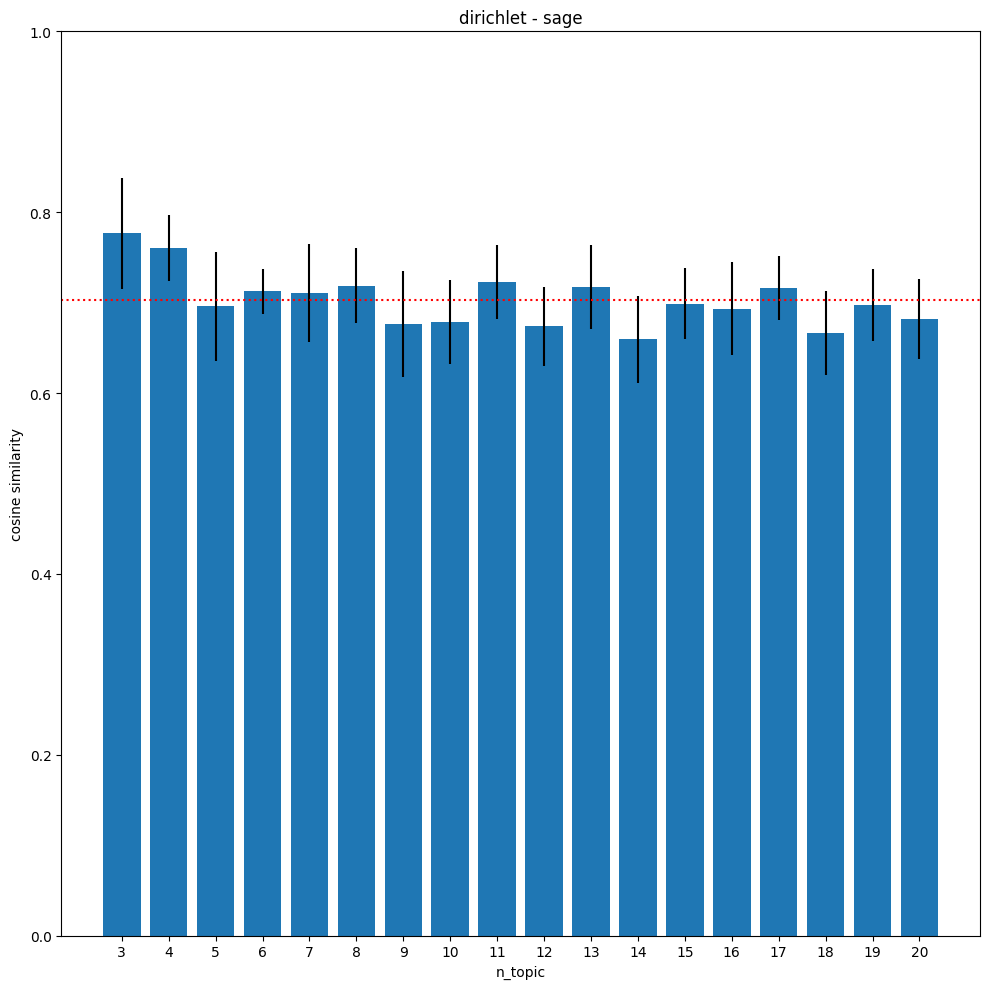

In [8]:
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 10000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
}
cossim_list = []
true_doc_topic_list = []
estimated_doc_topic_list = []

for num_topics in range(3,21):
    gtm_model_args = {
        "n_topics": num_topics,
        "num_epochs":10,
        "update_prior": True,
        "w_prior":None,
        "doc_topic_prior": "dirichlet",
        "decoder_type": "sage",
        "encoder_hidden_layers":[],
        "decoder_hidden_layers":[300],
        "decoder_bias":False,
        "batch_size":200,
        "print_every":10000,
        "log_every":1,
        "seed":0
        }
    df_true_dist_list_gtm, docs_gtm = generate_docs_by_gtm(
        num_topics=num_topics,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        seed=0,
        update_prior=gtm_model_args["update_prior"],
        doc_args=doc_args,
        is_output=False,
    )
    ### doc topic distribution (with covs)
    df_test = pd.DataFrame(
        data={
            "doc":docs_gtm["doc"],
            "doc_clean":docs_gtm["doc"],
            "prevalence":docs_gtm["prevalence_covariates"],
            "content": docs_gtm["content_covariates"]
        }
    )
    test_dataset = GTMCorpus(
        df_test,
        embeddings_type = None,
        prevalence="~ prevalence",
        content="~ content",
    )
    tm_test = GTM(
        train_data = test_dataset,
        **gtm_model_args,
    )
    df_doc_topic_gtm = pd.DataFrame(
            tm_test.get_doc_topic_distribution(test_dataset),
            index=["Doc{}".format(i) for i in range(doc_args["num_docs"])],
            columns=["Topic{}".format(i) for i in range(num_topics)],
        )
    true_df = df_true_dist_list_gtm[0]
    estimated_df = df_doc_topic_gtm

    ### matching the columns of estimated doc_topic dist with those of true doc_topic dist by maximizing dot-product
    score_list = []
    for true_col in true_df.columns:
        true_target_col = true_df.loc[:, true_col]
        score_list_per_row = []
        for col in estimated_df.columns:
            target_col = estimated_df.loc[:, col]
            score_list_per_row.append(np.dot(target_col, true_target_col))
        score_list.append(score_list_per_row)
    corres_num_topic_dict_gtm = {}
    score_matrix = pd.DataFrame(score_list)
    true_topics, estimated_topics = linear_sum_assignment(-score_matrix)
    for true_topic, estimated_topic in zip(true_topics, estimated_topics):
        corres_num_topic_dict_gtm["Topic{}".format(true_topic)] = "Topic{}".format(
            estimated_topic
        )
    reanged_df_gtm = estimated_df.loc[:, corres_num_topic_dict_gtm.values()]
    reanged_df_gtm.columns = corres_num_topic_dict_gtm.keys()

    true_doc_topic_list.append(true_df)
    estimated_doc_topic_list.append(reanged_df_gtm)


    ### calculating the cossim scores between true and estimated doc_topic dist
    cossim_score_gtm = []
    for col in true_df.columns:
        inner_res = []
        series_1 = true_df.loc[:, col]
        series_2 = reanged_df_gtm.loc[:, col]
        cossim_score_gtm.append(
            np.dot(series_1.T, series_2)
            / (np.linalg.norm(series_1) * np.linalg.norm(series_2)))
    cossim_list.append(cossim_score_gtm)
    print("finished {} topics' simulation".format(num_topics))
    print()

fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax = fig.add_subplot(1, 1, 1,xlabel="n_topic", ylabel="cosine similarity")
df_score_res = pd.DataFrame(cossim_list,index=["Topic{}".format(i) for i in range(3,21)])
x = np.array(range(3,21))
mean = df_score_res.mean(axis=1)
std = df_score_res.std(axis=1)
ax.bar(x, mean, yerr=std)
ax.axhline(mean.mean(), color='r', linestyle='dotted')
ax.set_ylim(0, 1)
ax.set_xticks(range(3,21))
ax.set_title("{} - {}".format(gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
# plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()